This notebook once served as a technical test from a certain tech company. The deadline was 7 days after the email received, and I must work on 2 from 3 projects provided. This study case is the 2nd case that I chose and it's about sentiment analysis from comments in social media, that surely utilize natural language processing (NLP).

# Task

1. Create sentiment analysis with three classes: Positive, Neutral, and Negative for all blank cases (test set) using data tagged (training set);
2. Show top 5 words/phrases which appear often from each class;
3. What are the insights obtained from the data?
4. Explain the method and evaluation used.

# Libraries

Let's load some libraries for data wrangling and data visualization.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

The data was provided by the tech company as a technical test for data science position.

In [2]:
df = pd.read_csv('D:/Tes/Churn/Dataset 2.csv', sep=';')
df.head()

Case Number Contact Type Opened Date         Enquiry Details  \
0    143913471    Instagram  2021-03-17  General Enquiries_Logs   
1    143927644    Instagram  2021-03-18  General Enquiries_Logs   
2    143930340    Instagram  2021-03-18  General Enquiries_Logs   
3    143931268    Instagram  2021-03-18  General Enquiries_Logs   
4    143948303    Instagram  2021-03-18  General Enquiries_Logs   

    Enquiry Type                                        Description Sentiment  
0  Logistics_New  Susah nih ga bisa milih jasa kirim ?          ...  Negative  
1  Logistics_New  Bye shopee. Kita beralih ke apk lain ? membuat...  Negative  
2  Logistics_New  jelek banget sistem expedisi yg baru nya ? fro...  Negative  
3  Logistics_New  Padahal mau cekout skincare sepatu baju album ...  Negative  
4  Logistics_New   mana ada mutu nya. Haha yg ada bikin pelangga...  Negative

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20327 entries, 0 to 20326
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Case Number      20327 non-null  int64 
 1   Contact Type     20327 non-null  object
 2   Opened Date      20327 non-null  object
 3   Enquiry Details  20327 non-null  object
 4   Enquiry Type     20327 non-null  object
 5   Description      20287 non-null  object
 6   Sentiment        12949 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


The dataset contains 7 columns with 12949 data of sentiment. We need to make a model from that data, and predict the rest of it. It also seems that some descriptions or comments are missing.

# Data Cleaning

First thing first.

## Case Number

Since the dataset came with unique identifier column, let's check whether the dataset contains duplicate data.

In [4]:
df['Case Number'].nunique()

20316

In [5]:
len(df)-df['Case Number'].nunique()

11

We have 11 duplicates.

### Dupe

Let's search the dupes.

In [6]:
dupe_no=df['Case Number'].value_counts().reset_index()
dupe_no=dupe_no[dupe_no['Case Number']>1]['index']
dupe_no=list(dupe_no)
dupe_no

[166395629,
 166372090,
 140595422,
 140948834,
 166347734,
 166415483,
 166415433,
 166372056,
 166426639,
 166395592,
 166372091]

In [7]:
df[df['Case Number'].isin(dupe_no)].sort_values('Case Number')

Case Number       Contact Type Opened Date  \
4447     140595422            Twitter  2021-03-06   
4448     140595422            Twitter  2021-03-06   
5988     140948834           Facebook  2021-03-07   
6262     140948834           Facebook  2021-03-07   
8020     166347734  Google Play Store   21/May/21   
8021     166347734  Google Play Store   21/May/21   
18282    166372056  Google Play Store   21/May/21   
18289    166372056  Google Play Store   21/May/21   
18290    166372090  Google Play Store   21/May/21   
18283    166372090  Google Play Store   21/May/21   
18284    166372091  Google Play Store   21/May/21   
18291    166372091  Google Play Store   21/May/21   
18285    166395592  Google Play Store   21/May/21   
18292    166395592  Google Play Store   21/May/21   
18286    166395629  Google Play Store   21/May/21   
18293    166395629  Google Play Store   21/May/21   
18287    166415433  Google Play Store   21/May/21   
18294    166415433  Google Play Store   21/May/21   
18295    166415483  Google Play Store   21/May/21   
18288    166415483  Google Play Store   21/May/21   
3324     166426639            Twitter  2021-05-21   
3323     166426639            Twitter  2021-05-21   

                            Enquiry Details   Enquiry Type  \
4447                 General Enquiries_Logs  Logistics_New   
4448                 General Enquiries_Logs  Logistics_New   
5988        General Technical Issue_General        General   
6262        General Technical Issue_General        General   
8020   Masking (Standard Service Type)_Logs  Logistics_New   
8021   Masking (Standard Service Type)_Logs  Logistics_New   
18282  Masking (Standard Service Type)_Logs  Logistics_New   
18289  Masking (Standard Service Type)_Logs  Logistics_New   
18290  Masking (Standard Service Type)_Logs  Logistics_New   
18283  Masking (Standard Service Type)_Logs  Logistics_New   
18284  Masking (Standard Service Type)_Logs  Logistics_New   
18291  Masking (Standard Service Type)_Logs  Logistics_New   
18285  Masking (Standard Service Type)_Logs  Logistics_New   
18292  Masking (Standard Service Type)_Logs  Logistics_New   
18286  Masking (Standard Service Type)_Logs  Logistics_New   
18293  Masking (Standard Service Type)_Logs  Logistics_New   
18287  Masking (Standard Service Type)_Logs  Logistics_New   
18294  Masking (Standard Service Type)_Logs  Logistics_New   
18295  Masking (Standard Service Type)_Logs  Logistics_New   
18288  Masking (Standard Service Type)_Logs  Logistics_New   
3324   Masking (Standard Service Type)_Logs  Logistics_New   
3323   Masking (Standard Service Type)_Logs  Logistics_New   

                                             Description Sentiment  
4447   ShopeeCare Direct Halo admin, saya ko ngga bis...       NaN  
4448   ShopeeCare Direct Halo admin, saya ko ngga bis...       NaN  
5988   NORMAL - #3PLMasking - NA \n Issue: kendala up...   Neutral  
6262   NORMAL - #3PLMasking - NA \n Issue: kendala up...       NaN  
8020   Tiap belaja lancar jaya. Cuma jasa pengiriman ...   Neutral  
8021   Tiap belaja lancar jaya. Cuma jasa pengiriman ...   Neutral  
18282  Tolong Pihak shoppe yang bersangkutan untuk me...  Negative  
18289  Tolong Pihak shoppe yang bersangkutan untuk me...  Negative  
18290  Klau bisa jasa kirimnya bisa di pilh kaya dulu...  Negative  
18283  Klau bisa jasa kirimnya bisa di pilh kaya dulu...  Negative  
18284  Sekarang kok ribet shopee gak bs milih expedis...  Negative  
18291  Sekarang kok ribet shopee gak bs milih expedis...  Negative  
18285  Shopee srkrng g bisa pilih detail expedisi,. I...  Negative  
18292  Shopee srkrng g bisa pilih detail expedisi,. I...  Negative  
18286                           Ga bisa pilih jasa kirim  Negative  
18293                           Ga bisa pilih jasa kirim  Negative  
18287  Apps shopee skarang jadi lemot gak kyak dlu.. ...  Negative  
18294  Apps shopee skarang jadi lemot gak kyak dlu.. ...  Negative  
18295  Bagus.. sudah berkali2 belanja di shopee g

### Delete Dupe

We need to delete duplicate data.

In [8]:
delete_index=df[df['Case Number'].isin(dupe_no)].sort_values('Case Number').reset_index().reset_index()
index=delete_index[delete_index['level_0']%2!=0].index
index=delete_index.loc[index]['index']
index=list(index)

In [9]:
df.drop(index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df[df['Case Number'].isin(dupe_no)].sort_values('Case Number')

Case Number       Contact Type Opened Date  \
4446     140595422            Twitter  2021-03-06   
5986     140948834           Facebook  2021-03-07   
8017     166347734  Google Play Store   21/May/21   
18278    166372056  Google Play Store   21/May/21   
18283    166372090  Google Play Store   21/May/21   
18279    166372091  Google Play Store   21/May/21   
18280    166395592  Google Play Store   21/May/21   
18281    166395629  Google Play Store   21/May/21   
18282    166415433  Google Play Store   21/May/21   
18284    166415483  Google Play Store   21/May/21   
3323     166426639            Twitter  2021-05-21   

                            Enquiry Details   Enquiry Type  \
4446                 General Enquiries_Logs  Logistics_New   
5986        General Technical Issue_General        General   
8017   Masking (Standard Service Type)_Logs  Logistics_New   
18278  Masking (Standard Service Type)_Logs  Logistics_New   
18283  Masking (Standard Service Type)_Logs  Logistics_New   
18279  Masking (Standard Service Type)_Logs  Logistics_New   
18280  Masking (Standard Service Type)_Logs  Logistics_New   
18281  Masking (Standard Service Type)_Logs  Logistics_New   
18282  Masking (Standard Service Type)_Logs  Logistics_New   
18284  Masking (Standard Service Type)_Logs  Logistics_New   
3323   Masking (Standard Service Type)_Logs  Logistics_New   

                                             Description Sentiment  
4446   ShopeeCare Direct Halo admin, saya ko ngga bis...       NaN  
5986   NORMAL - #3PLMasking - NA \n Issue: kendala up...   Neutral  
8017   Tiap belaja lancar jaya. Cuma jasa pengiriman ...   Neutral  
18278  Tolong Pihak shoppe yang bersangkutan untuk me...  Negative  
18283  Klau bisa jasa kirimnya bisa di pilh kaya dulu...  Negative  
18279  Sekarang kok ribet shopee gak bs milih expedis...  Negative  
18280  Shopee srkrng g bisa pilih detail expedisi,. I...  Negative  
18281                           Ga bisa pilih jasa kirim  Negative  
18282  Apps shopee skarang jadi lemot gak kyak dlu.. ...  Negative  
18284  Bagus.. sudah berkali2 belanja di shopee gk pe...  Negative  
3323    sekarang shopee sudah tidak bisa ganti kurir ...   Neutral

## Contact Type

In [11]:
df['Contact Type'].value_counts() # Looking good, no duplicates or typo either

Google Play Store    12731
Twitter               3340
Instagram             2646
Facebook              1166
App Store              433
Name: Contact Type, dtype: int64

## Opened Date

In [12]:
df['Opened Date'].unique()

array(['2021-03-17', '2021-03-18', '2021-03-16', '2021-04-04',
       '2021-03-19', '2021-03-25', '2021-04-11', '2021-03-21',
       '2021-09-12', '2021-09-15', '2021-03-29', '2021-04-09',
       '2021-04-10', '2021-03-20', '2021-04-03', '2021-03-30',
       '2021-04-08', '2021-03-28', '2021-04-06', '2021-04-16',
       '2021-03-23', '2021-04-02', '2021-04-05', '2021-04-13',
       '2021-04-07', '2021-07-28', '2021-03-26', '2021-05-20',
       '2021-03-31', '2021-04-01', '2021-07-10', '2021-03-27',
       '2021-04-12', '2021-04-18', '2021-05-07', '2021-05-04',
       '2021-03-22', '2021-04-14', '2021-09-01', '2021-05-16',
       '2021-04-27', '2021-03-24', '2021-07-25', '2021-05-29',
       '2021-04-15', '2021-04-17', '2021-04-19', '2021-09-13',
       '2021-05-05', '2021-09-16', '2021-09-14', '2021-09-17',
       '2021-09-21', '2021-04-20', '2021-05-10', '2021-06-03',
       '2021-05-01', '2021-03-12', '2021-09-29', '2021-09-09',
       '2021-09-08', '2021-03-15', '2021-05-27', '2021-

It seems that there were two different format of dates. Let's fix them.

In [13]:
month_unique=[]
for i in df[df['Opened Date'].str.contains('/')]['Opened Date']:
    i=i.split('/')
    if i[1] not in month_unique:
        month_unique.append(i[1])
    else:
        continue
month_unique

['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Sep', 'Aug']

We need to change Mar to 03; Apr to 04; May to 05; Jun to 06; Jul to 07; Aug to 08; Sep to 09.

In [14]:
year_unique=[]
for i in df[df['Opened Date'].str.contains('/')]['Opened Date']:
    i=i.split('/')
    if i[2] not in year_unique:
        year_unique.append(i[2])
    else:
        continue
year_unique

['21']

We need to change 21 to 2021.

In [15]:
date=[]
for i in df[df['Opened Date'].str.contains('/')]['Opened Date']:
    i=i.split('/')
    if i[1]=='Mar':
        i[1]='03'
    elif i[1]=='Apr':
        i[1]='04'
    elif i[1]=='May':
        i[1]='05'
    elif i[1]=='Jun':
        i[1]='06'
    elif i[1]=='Jul':
        i[1]='07'
    elif i[1]=='Aug':
        i[1]='08'
    elif i[1]=='Sep':
        i[1]='09'
    change=['1','2','3','4','5','6','7','8','9']    
    if i[0] in change:
        i[0]='0'+i[0]
    i='2021'+'-'+i[1]+'-'+i[0]
    date.append(i)
len(date)

13164

In [16]:
df.loc[df['Opened Date'].str.contains('/'),'Opened Date']=date
df['Opened Date'].unique()

array(['2021-03-17', '2021-03-18', '2021-03-16', '2021-04-04',
       '2021-03-19', '2021-03-25', '2021-04-11', '2021-03-21',
       '2021-09-12', '2021-09-15', '2021-03-29', '2021-04-09',
       '2021-04-10', '2021-03-20', '2021-04-03', '2021-03-30',
       '2021-04-08', '2021-03-28', '2021-04-06', '2021-04-16',
       '2021-03-23', '2021-04-02', '2021-04-05', '2021-04-13',
       '2021-04-07', '2021-07-28', '2021-03-26', '2021-05-20',
       '2021-03-31', '2021-04-01', '2021-07-10', '2021-03-27',
       '2021-04-12', '2021-04-18', '2021-05-07', '2021-05-04',
       '2021-03-22', '2021-04-14', '2021-09-01', '2021-05-16',
       '2021-04-27', '2021-03-24', '2021-07-25', '2021-05-29',
       '2021-04-15', '2021-04-17', '2021-04-19', '2021-09-13',
       '2021-05-05', '2021-09-16', '2021-09-14', '2021-09-17',
       '2021-09-21', '2021-04-20', '2021-05-10', '2021-06-03',
       '2021-05-01', '2021-03-12', '2021-09-29', '2021-09-09',
       '2021-09-08', '2021-03-15', '2021-05-27', '2021-

In [17]:
df['Opened Date']=pd.to_datetime(df['Opened Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20316 entries, 0 to 20315
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Case Number      20316 non-null  int64         
 1   Contact Type     20316 non-null  object        
 2   Opened Date      20316 non-null  datetime64[ns]
 3   Enquiry Details  20316 non-null  object        
 4   Enquiry Type     20316 non-null  object        
 5   Description      20276 non-null  object        
 6   Sentiment        12940 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.1+ MB


In [18]:
df['Opened Date'][0]

Timestamp('2021-03-17 00:00:00')

## Enquiry Details and Type

### Enquiry Details

In [19]:
df['Enquiry Details'].value_counts()

General Enquiries_Logs                  19217
Masking (Standard Service Type)_Logs      613
General Enquiries_MKT                     319
General Enquiries_ShopeePay               105
Checkout/Payment_ShopeePay                 40
Campaign & Promotion_MKT                    7
Shopee Coins_MKT                            3
Refund/Escrow - Merchant                    2
JNE                                         2
Voucher/Promo_MKT                           2
Account & Security_ShopeePay                1
Shopee Express                              1
General Technical Issue_General             1
General Shopee Enquiries_General            1
J&T                                         1
Registration/KYC_ShopeePay                  1
Name: Enquiry Details, dtype: int64

### Enquiry Type

In [20]:
df['Enquiry Type'].value_counts()

Logistics_New    19830
Marketing          331
ShopeePay          149
Logistics            4
General              2
Name: Enquiry Type, dtype: int64

### Relationship

In [21]:
df.groupby('Enquiry Type')['Enquiry Details'].value_counts()

Enquiry Type   Enquiry Details                     
General        General Shopee Enquiries_General            1
               General Technical Issue_General             1
Logistics      JNE                                         2
               J&T                                         1
               Shopee Express                              1
Logistics_New  General Enquiries_Logs                  19217
               Masking (Standard Service Type)_Logs      613
Marketing      General Enquiries_MKT                     319
               Campaign & Promotion_MKT                    7
               Shopee Coins_MKT                            3
               Voucher/Promo_MKT                           2
ShopeePay      General Enquiries_ShopeePay               105
               Checkout/Payment_ShopeePay                 40
               Refund/Escrow - Merchant                    2
               Account & Security_ShopeePay                1
               Registration/KYC_S

Everything was put in order. OK.

## Description

In [22]:
df['Description'].nunique()

19805

In [23]:
len(df)-df['Description'].nunique() # same entry

511

The dataset contains 511 same entries of description.

### Dupe

In [24]:
dupe=[]
count=df['Description'].value_counts().reset_index()
for i in count[count['Description']>2]['index']:
    if i not in dupe:
        dupe.append(i)
    else:
        continue
# dupe

In [25]:
dupeDF=df[df['Description'].isin(dupe)].sort_values('Description')
dupeDF

Case Number Contact Type Opened Date         Enquiry Details  \
5967    152402221      Twitter  2021-04-12  General Enquiries_Logs   
5955    149637676      Twitter  2021-04-05  General Enquiries_Logs   
5790    165169797      Twitter  2021-05-18  General Enquiries_Logs   
6647    146520358     Facebook  2021-03-26  General Enquiries_Logs   
6697    149526485     Facebook  2021-04-05  General Enquiries_Logs   
...           ...          ...         ...                     ...   
6373    143691521     Facebook  2021-03-17  General Enquiries_Logs   
6362    143661785     Facebook  2021-03-17  General Enquiries_Logs   
6351    143636372     Facebook  2021-03-17  General Enquiries_Logs   
6144    144838444     Facebook  2021-03-20  General Enquiries_Logs   
6395    143759787     Facebook  2021-03-17  General Enquiries_Logs   

       Enquiry Type                                        Description  \
5967  Logistics_New                                                      
5955  Logistics_New                                                      
5790  Logistics_New                                                      
6647  Logistics_New  1. Issue : Perihal 3pl masking\n 2. Action tak...   
6697  Logistics_New  1. Issue : Perihal 3pl masking\n 2. Action tak...   
...             ...                                                ...   
6373  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6362  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6351  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6144  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6395  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   

     Sentiment  
5967       NaN  
5955       NaN  
5790       NaN  
6647       NaN  
6697       NaN  
...        ...  
6373       NaN  
6362       NaN  
6351       NaN  
6144   Neutral  
6395       NaN  

[342 rows x 7 columns]

The description column has hidden missing values.

In [26]:
dupeDF[dupeDF['Description'].isna()]

Empty DataFrame
Columns: [Case Number, Contact Type, Opened Date, Enquiry Details, Enquiry Type, Description, Sentiment]
Index: []

In [27]:
dupeDF.iloc[0]['Description']

'                                           '

In [28]:
index=df[df['Description']=='                                           '].index
df.drop(index,inplace=True)

In [29]:
dupeDF=df[df['Description'].isin(dupe)].sort_values('Description')
dupeDF

Case Number Contact Type Opened Date         Enquiry Details  \
6697    149526485     Facebook  2021-04-05  General Enquiries_Logs   
6953    149485050     Facebook  2021-04-04  General Enquiries_Logs   
7005    151673599     Facebook  2021-04-10  General Enquiries_Logs   
6647    146520358     Facebook  2021-03-26  General Enquiries_Logs   
2558    143743040    Instagram  2021-03-17  General Enquiries_Logs   
...           ...          ...         ...                     ...   
6373    143691521     Facebook  2021-03-17  General Enquiries_Logs   
6362    143661785     Facebook  2021-03-17  General Enquiries_Logs   
6351    143636372     Facebook  2021-03-17  General Enquiries_Logs   
6144    144838444     Facebook  2021-03-20  General Enquiries_Logs   
6395    143759787     Facebook  2021-03-17  General Enquiries_Logs   

       Enquiry Type                                        Description  \
6697  Logistics_New  1. Issue : Perihal 3pl masking\n 2. Action tak...   
6953  Logistics_New  1. Issue : Perihal 3pl masking\n 2. Action tak...   
7005  Logistics_New  1. Issue : Perihal 3pl masking\n 2. Action tak...   
6647  Logistics_New  1. Issue : Perihal 3pl masking\n 2. Action tak...   
2558  Logistics_New  Cek DM min                                    ...   
...             ...                                                ...   
6373  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6362  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6351  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6144  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   
6395  Logistics_New  normal-#3plmasking- na\n Issue: user kasih fee...   

     Sentiment  
6697       NaN  
6953       NaN  
7005       NaN  
6647       NaN  
2558       NaN  
...        ...  
6373       NaN  
6362       NaN  
6351       NaN  
6144   Neutral  
6395       NaN  

[339 rows x 7 columns]

Other than the hidden missing values, the others have different case number so we will still use them for modeling. This table above just FYI.

## Missing Data

Now, let's clear the missing data.

In [30]:
df.isna().sum()

Case Number           0
Contact Type          0
Opened Date           0
Enquiry Details       0
Enquiry Type          0
Description          40
Sentiment          7373
dtype: int64

### Description

In [31]:
df[df['Description'].isna()]

Case Number       Contact Type Opened Date         Enquiry Details  \
7927     155607599  Google Play Store  2021-04-22  General Enquiries_Logs   
7974     160060782  Google Play Store  2021-05-05  General Enquiries_Logs   
8103     144235237  Google Play Store  2021-03-18  General Enquiries_Logs   
8444     144629053  Google Play Store  2021-03-20  General Enquiries_Logs   
9042     144877550  Google Play Store  2021-03-21  General Enquiries_Logs   
9222     144952846  Google Play Store  2021-03-21  General Enquiries_Logs   
9545     145064322  Google Play Store  2021-03-21  General Enquiries_Logs   
9897     145280609  Google Play Store  2021-03-22  General Enquiries_Logs   
10170    145512180  Google Play Store  2021-03-23  General Enquiries_Logs   
10259    145569552  Google Play Store  2021-03-23  General Enquiries_Logs   
10476    145687879  Google Play Store  2021-03-23  General Enquiries_Logs   
11149    146119996  Google Play Store  2021-03-25  General Enquiries_Logs   
11833    146463523  Google Play Store  2021-03-26  General Enquiries_Logs   
11873    146498757  Google Play Store  2021-03-26  General Enquiries_Logs   
12054    146773544  Google Play Store  2021-03-27  General Enquiries_Logs   
12060    146784411  Google Play Store  2021-03-27  General Enquiries_Logs   
12653    147410850  Google Play Store  2021-03-29  General Enquiries_Logs   
12663    147432339  Google Play Store  2021-03-29  General Enquiries_Logs   
12757    147643590  Google Play Store  2021-03-30  General Enquiries_Logs   
12864    147742634  Google Play Store  2021-03-30  General Enquiries_Logs   
12892    147787556  Google Play Store  2021-03-30  General Enquiries_Logs   
13077    148018466  Google Play Store  2021-03-31  General Enquiries_Logs   
13543    148735479  Google Play Store  2021-04-02  General Enquiries_Logs   
13984    149060908  Google Play Store  2021-04-03  General Enquiries_Logs   
14395    149584625  Google Play Store  2021-04-05  General Enquiries_Logs   
14559    149734975  Google Play Store  2021-04-05  General Enquiries_Logs   
15162    150364407  Google Play Store  2021-04-07  General Enquiries_Logs   
15263    150453806  Google Play Store  2021-04-07  General Enquiries_Logs   
15275    150454228  Google Play Store  2021-04-07  General Enquiries_Logs   
15356    150356214  Google Play Store  2021-04-07  General Enquiries_Logs   
15679    151227824  Google Play Store  2021-04-09  General Enquiries_Logs   
16355    152210707  Google Play Store  2021-04-12  General Enquiries_Logs   
16610    152692989  Google Play Store  2021-04-13  General Enquiries_Logs   
16793    153149412  Google Play Store  2021-04-14  General Enquiries_Logs   
16908    153536307  Google Play Store  2021-04-16  General Enquiries_Logs   
17437    155948451  Google Play Store  2021-04-23  General Enquiries_Logs   
19504    143972183  Google Play Store  2021-03-18  General Enquiries_Logs   
19537    143992206  Google Play Store  2021-03-18  General Enquiries_Logs   
19701    144079348  Google Play Store  2021-03-18  General Enquiries_Logs   
20210    144234688  Google Play Store  2021-03-18  General Enquiries_Logs   

        Enquiry Type Description Sentiment  
7927   Logistics_New         NaN   Neutral  
7974   Logistics_New         NaN   Neutral  
8103   Logistics_New         NaN  Negative  
8444   Logistics_New         NaN  Negative  
9042   Logistics_New         NaN  Negative  
9222   Logistics_New         NaN  Negative  
9545   Logistics_New         NaN  Negative  
9897   Logistics_New         NaN  Negative  
10170  Logistics_New         NaN  Negative  
10259  Logistics_New         NaN  Negative  
10476  Logistics_New         NaN  Negative  
11149  Logistics_New         NaN  Negative  
11833  Logistics_New         NaN  Negative  
11873  Logistics_New         NaN  Negative  
12054  Logistics_New         NaN  Negative  
12060  Logistics_New         NaN  Negative  
12653  Logistics_New         NaN  Negative  
12663  Logistics_New         NaN  Negat

In [32]:
index=df[df['Description'].isna()].index
df.drop(index, inplace=True)

In [33]:
df.isna().sum()

Case Number           0
Contact Type          0
Opened Date           0
Enquiry Details       0
Enquiry Type          0
Description           0
Sentiment          7369
dtype: int64

### Sentiment

We need to divide the data we will use for modeling and the prediction.

In [34]:
df_test=df[df['Sentiment'].isna()]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7369 entries, 798 to 20315
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Case Number      7369 non-null   int64         
 1   Contact Type     7369 non-null   object        
 2   Opened Date      7369 non-null   datetime64[ns]
 3   Enquiry Details  7369 non-null   object        
 4   Enquiry Type     7369 non-null   object        
 5   Description      7369 non-null   object        
 6   Sentiment        0 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 460.6+ KB


In [35]:
df_train=df[df['Sentiment'].notna()]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12904 entries, 0 to 18672
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Case Number      12904 non-null  int64         
 1   Contact Type     12904 non-null  object        
 2   Opened Date      12904 non-null  datetime64[ns]
 3   Enquiry Details  12904 non-null  object        
 4   Enquiry Type     12904 non-null  object        
 5   Description      12904 non-null  object        
 6   Sentiment        12904 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 806.5+ KB


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20315
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Case Number      20273 non-null  int64         
 1   Contact Type     20273 non-null  object        
 2   Opened Date      20273 non-null  datetime64[ns]
 3   Enquiry Details  20273 non-null  object        
 4   Enquiry Type     20273 non-null  object        
 5   Description      20273 non-null  object        
 6   Sentiment        12904 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.2+ MB


Now the dataset is ready to be used.

# Exploratory Data Analysis

## Sentiment Overall

In [37]:
df_train['Sentiment'].value_counts()

Negative    10706
Neutral      1979
Positive      219
Name: Sentiment, dtype: int64

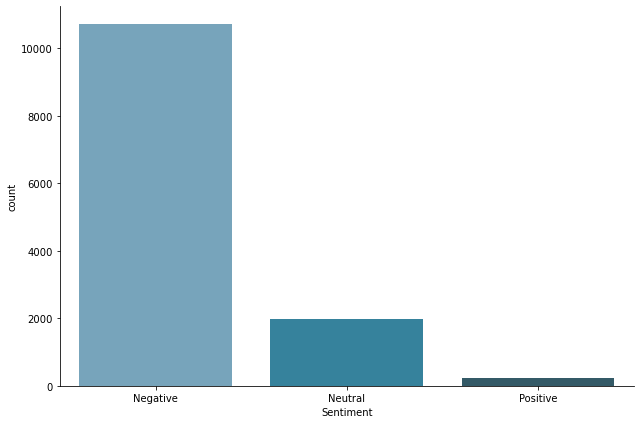

In [38]:
sns.catplot(x="Sentiment", data=df_train, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

Data is imbalanced.

## Sentiment by Contact Type

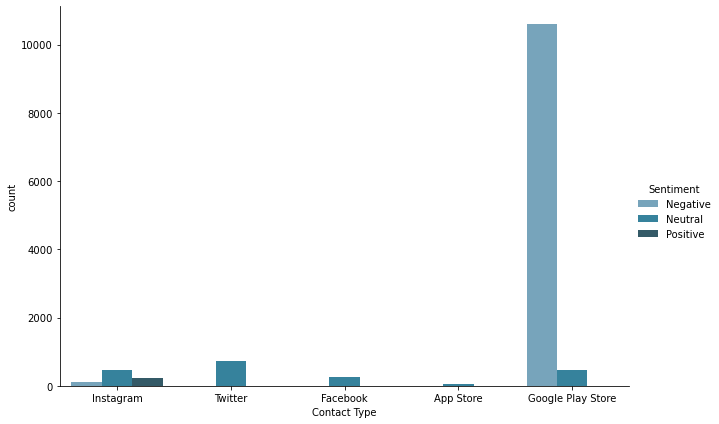

In [39]:
sns.catplot(x="Contact Type", hue='Sentiment', data=df_train, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Instagram

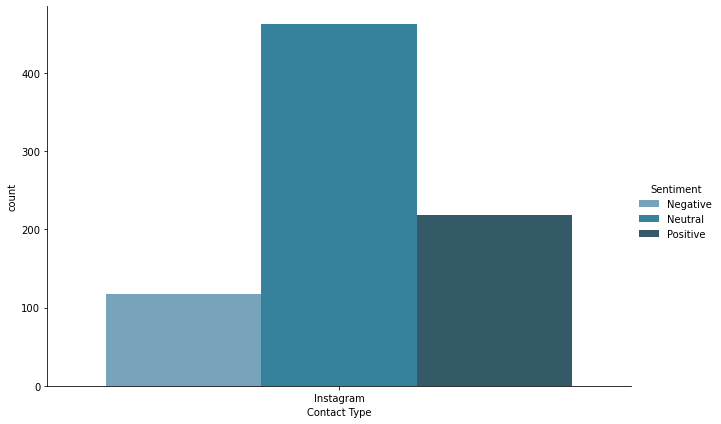

In [40]:
for_plot=df_train[df_train['Contact Type']=='Instagram']
sns.catplot(x="Contact Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Twitter

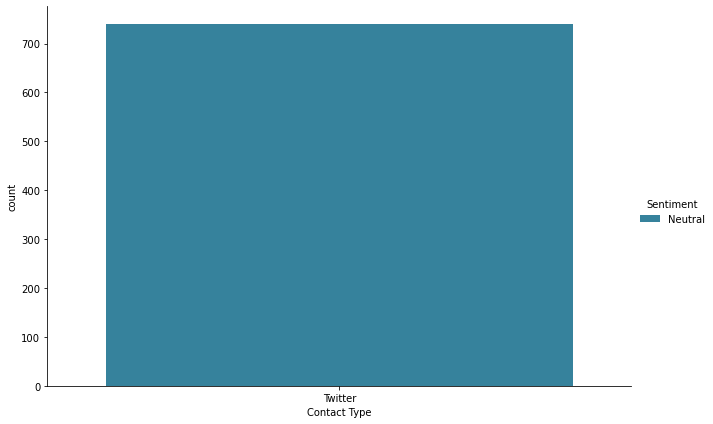

In [41]:
for_plot=df_train[df_train['Contact Type']=='Twitter']
sns.catplot(x="Contact Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Facebook

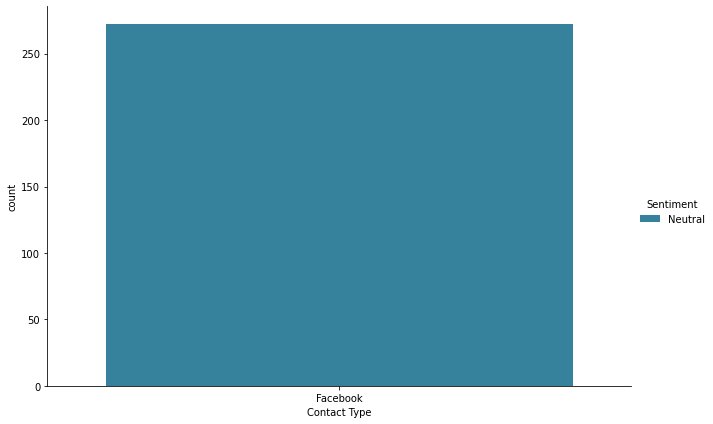

In [42]:
for_plot=df_train[df_train['Contact Type']=='Facebook']
sns.catplot(x="Contact Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### App Store

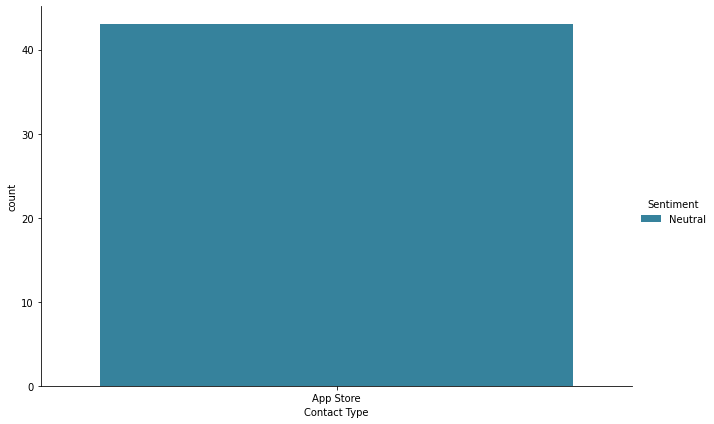

In [43]:
for_plot=df_train[df_train['Contact Type']=='App Store']
sns.catplot(x="Contact Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Google Play Store

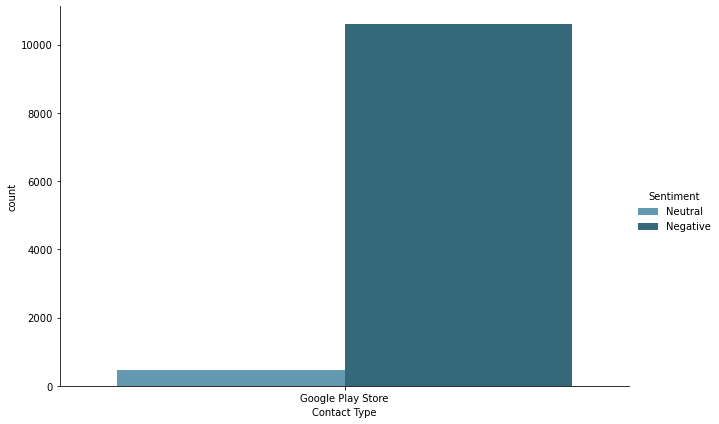

In [44]:
for_plot=df_train[df_train['Contact Type']=='Google Play Store']
sns.catplot(x="Contact Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Summary

Positive sentiment comments only came from Instagram. While FB, Twitter and App Store only consist of Neutral sentiment comments. Most of the negative sentiment comments came from Google Play Store, without any Positive sentiment comment. That said, we can say that people only commenting on Google Play Store when they are dissatisfied with their order.

## Sentiment by Enquiry Type

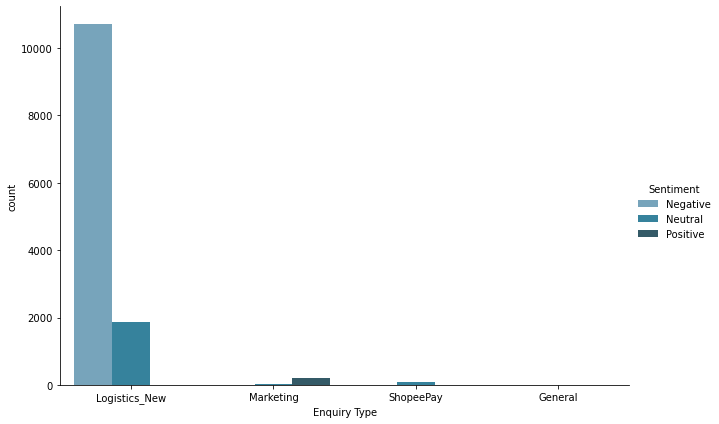

In [45]:
sns.catplot(x="Enquiry Type", hue='Sentiment', data=df_train, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Logistics New

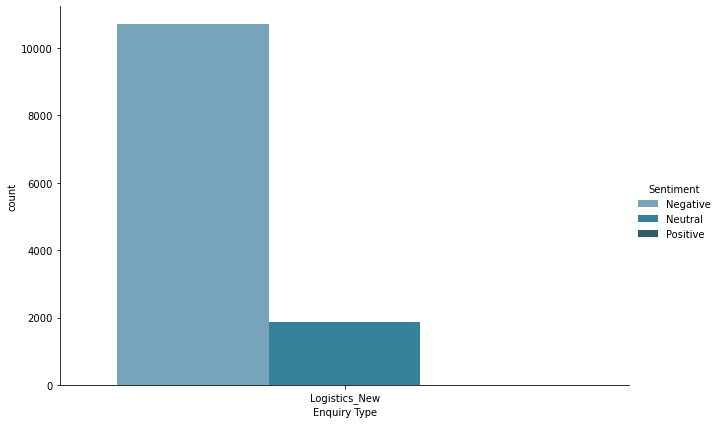

In [46]:
for_plot=df_train[df_train['Enquiry Type']=='Logistics_New']
sns.catplot(x="Enquiry Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

In [47]:
df_train[df_train['Enquiry Type']=='Logistics_New']['Sentiment'].value_counts()

Negative    10700
Neutral      1870
Positive        3
Name: Sentiment, dtype: int64

In [48]:
pd.set_option('display.max_colwidth', 1000)
df_train[(df_train['Enquiry Type']=='Logistics_New')&(df_train['Sentiment']=='Positive')]

Case Number Contact Type Opened Date         Enquiry Details  \
627    151810324    Instagram  2021-04-10  General Enquiries_Logs   
643    150947145    Instagram  2021-04-08  General Enquiries_Logs   
684    143896698    Instagram  2021-03-17  General Enquiries_Logs   

      Enquiry Type  \
627  Logistics_New   
643  Logistics_New   
684  Logistics_New   

                                                                                                                                                                                                                                Description  \
627   tetap dihatiii saya order tanggal 9 alhamdullilah udh sampe hari ini , terkait jasa kirim kita bisa kok ganti sesuai keinginan kita setelah cheout , gratis ongkir shopee gak ada obatnyaaa emang paling top...                         
643                                                                                                         udah lebih biasa pake si cepat,yang bener² ceper, malah di J&T yang super lama banget ?                                           
684                        Nasib tokoku gimana klo pada pindah lapak min2 ..tolong d pertimbangkan kalau ganti sistem pelanggan udh bnyak kita juga bayar admin setiap transaksi sekarang jd sepi? kudu nangis                                

    Sentiment  
627  Positive  
643  Positive  
684  Positive

Description in index 684 didn't match the Sentiment. Well, we can't do anything about that.

### Marketing

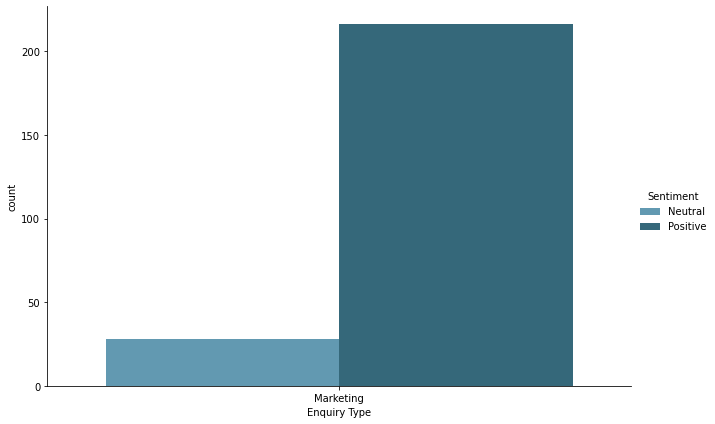

In [49]:
for_plot=df_train[df_train['Enquiry Type']=='Marketing']
sns.catplot(x="Enquiry Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### ShopeePay

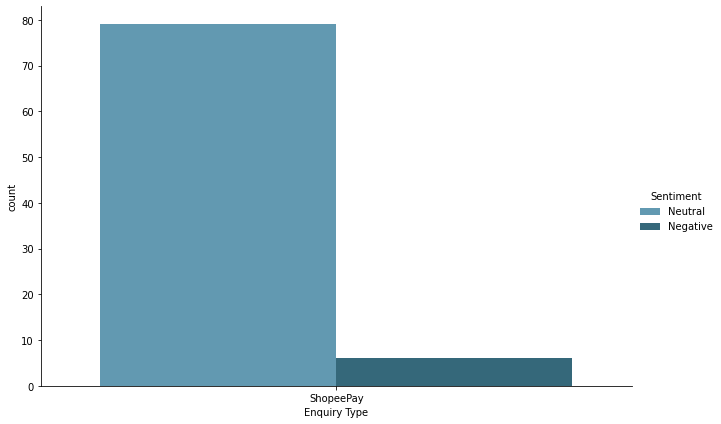

In [50]:
for_plot=df_train[df_train['Enquiry Type']=='ShopeePay']
sns.catplot(x="Enquiry Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### General

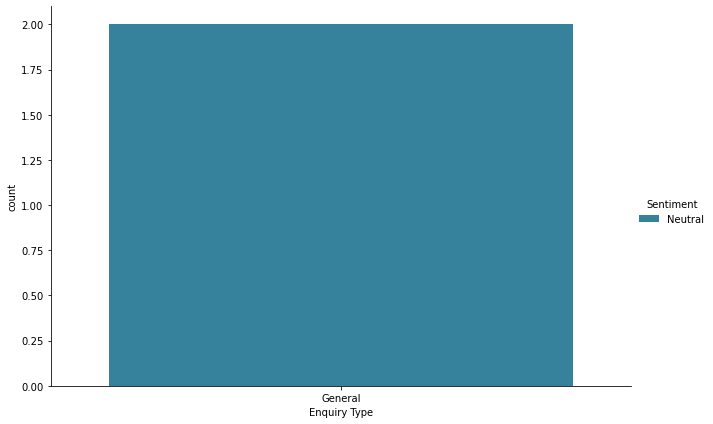

In [51]:
for_plot=df_train[df_train['Enquiry Type']=='General']
sns.catplot(x="Enquiry Type", hue='Sentiment', data=for_plot, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Summary

Most of the positive comments are related to marketing, while most of the complaints are related to new logistic system.

## Sentiment by Date

In [52]:
pd.set_option('display.max_rows',None)
for_plot=pd.crosstab(df_train['Opened Date'],df_train['Sentiment']).reset_index()
for_plot

Sentiment Opened Date  Negative  Neutral  Positive
0          2021-03-07         0        1         0
1          2021-03-09         0        1         0
2          2021-03-11         0        1         0
3          2021-03-16         8        3         0
4          2021-03-17        80       10         1
5          2021-03-18        94      402         0
6          2021-03-19       272      163         0
7          2021-03-20       653       76         0
8          2021-03-21       623       57         0
9          2021-03-22       366       18         0
10         2021-03-23       527       37         0
11         2021-03-24       514       12         0
12         2021-03-25       666       12         0
13         2021-03-26       269       19         0
14         2021-03-27       216       39         0
15         2021-03-28       183       29         0
16         2021-03-29       259       29         0
17         2021-03-30       246       49         0
18         2021-03-31       270       56         0
19         2021-04-01       141       39         0
20         2021-04-02       275       43         0
21         2021-04-03       373       72         0
22         2021-04-04       362      167         0
23         2021-04-05       422       30         0
24         2021-04-06       355       31         0
25         2021-04-07       227       17         0
26         2021-04-08       241       32         1
27         2021-04-09       277       16         0
28         2021-04-10       214       24         1
29         2021-04-11       192       18         0
30         2021-04-12       231       10         0
31         2021-04-13       143       19         0
32         2021-04-14       138       11         0
33         2021-04-15        97        8         0
34         2021-04-16       179       11         0
35         2021-04-17        79        9         0
36         2021-04-18        67       14         0
37         2021-04-19        41       10         0
38         2021-04-20        62        7         0
39         2021-04-21        56        7         0
40         2021-04-22        43        3         0
41         2021-04-23        58        3         0
42         2021-04-24        46        8         0
43         2021-04-25        23        4         0
44         2021-04-26        48        4         0
45         2021-04-27        53        6         0
46         2021-04-28        39        4         0
47         2021-04-29        34        8         0
48         2021-04-30        28        1         0
49         2021-05-01        23        3         0
50         2021-05-02        19        1         0
51         2021-05-03        32        2         0
52         2021-05-04        23        4         0
53         2021-05-05        32        2         0
54         2021-05-06        45        2         0
55         2021-05-07        36        5         0
56         2021-05-08        35        6         0
57         2021-05-09        26        6         0
58         2021-05-10        30        1         0
59         2021-05-11        22        5         0
60         2021-05-12        19        3         0
61         2021-05-13         4        2         0
62         2021-05-14        11        0         0
63         2021-05-15        12        0         0
64         2021-05-16        17        5         0
65         2021-05-17        24        3         0
66         2021-05-18        24        2         0
67         2021-05-19        28        4         0
68         2021-05-20        40       17         0
69         2021-05-21        26        6         0
70         2021-05-22        26        7         0
71         2021-05-23        16        3         0
72         2021-05-24        25        4         0
73         2021-05-25        19        8         0
74         2021-05-26        21        8         0
75         2021-05-27        21        9         0
76         2021-05-28        16        8         0
77         2021-05-29 

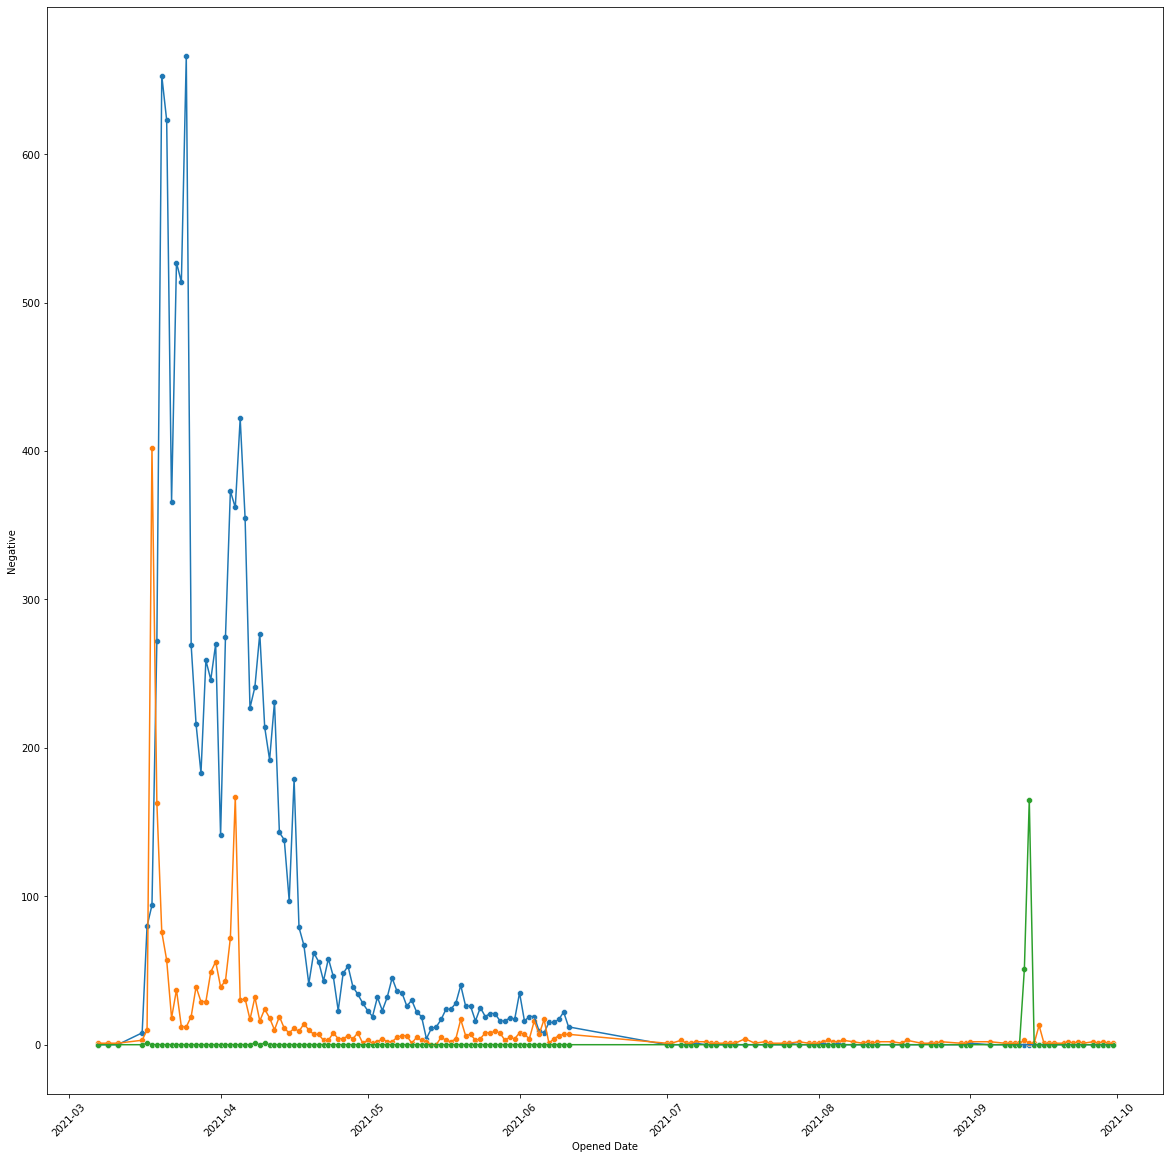

In [53]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Opened Date', y='Negative', data=for_plot)
sns.lineplot(x='Opened Date', y='Negative', data=for_plot)
sns.scatterplot(x='Opened Date', y='Neutral', data=for_plot)
sns.lineplot(x='Opened Date', y='Neutral', data=for_plot)
sns.scatterplot(x='Opened Date', y='Positive', data=for_plot)
sns.lineplot(x='Opened Date', y='Positive', data=for_plot)
plt.xticks(rotation=45)
plt.show()

### Negative

In [54]:
for_plot[for_plot['Negative']==for_plot['Negative'].max()]

Sentiment Opened Date  Negative  Neutral  Positive
12         2021-03-25       666       12         0

In [55]:
df_train[(df_train['Opened Date']=='2021-03-25')&(df_train['Sentiment']=='Negative')]

Case Number       Contact Type Opened Date         Enquiry Details  \
11079    146094052  Google Play Store  2021-03-25  General Enquiries_Logs   
11080    146094057  Google Play Store  2021-03-25  General Enquiries_Logs   
11081    146094059  Google Play Store  2021-03-25  General Enquiries_Logs   
11082    146094062  Google Play Store  2021-03-25  General Enquiries_Logs   
11083    146094067  Google Play Store  2021-03-25  General Enquiries_Logs   
11084    146094071  Google Play Store  2021-03-25  General Enquiries_Logs   
11085    146094076  Google Play Store  2021-03-25  General Enquiries_Logs   
11086    146094092  Google Play Store  2021-03-25  General Enquiries_Logs   
11087    146094098  Google Play Store  2021-03-25  General Enquiries_Logs   
11088    146094100  Google Play Store  2021-03-25  General Enquiries_Logs   
11089    146094105  Google Play Store  2021-03-25  General Enquiries_Logs   
11090    146094109  Google Play Store  2021-03-25  General Enquiries_Logs   
11091    146094113  Google Play Store  2021-03-25  General Enquiries_Logs   
11092    146094117  Google Play Store  2021-03-25  General Enquiries_Logs   
11093    146094125  Google Play Store  2021-03-25  General Enquiries_Logs   
11094    146094126  Google Play Store  2021-03-25  General Enquiries_Logs   
11095    146094127  Google Play Store  2021-03-25  General Enquiries_Logs   
11096    146094135  Google Play Store  2021-03-25  General Enquiries_Logs   
11097    146094136  Google Play Store  2021-03-25  General Enquiries_Logs   
11098    146094146  Google Play Store  2021-03-25  General Enquiries_Logs   
11099    146094148  Google Play Store  2021-03-25  General Enquiries_Logs   
11100    146094151  Google Play Store  2021-03-25  General Enquiries_Logs   
11101    146094155  Google Play Store  2021-03-25  General Enquiries_Logs   
11102    146094156  Google Play Store  2021-03-25  General Enquiries_Logs   
11103    146103167  Google Play Store  2021-03-25  General Enquiries_Logs   
11104    146103182  Google Play Store  2021-03-25  General Enquiries_Logs   
11105    146103185  Google Play Store  2021-03-25  General Enquiries_Logs   
11106    146103186  Google Play Store  2021-03-25  General Enquiries_Logs   
11107    146103190  Google Play Store  2021-03-25  General Enquiries_Logs   
11108    146103192  Google Play Store  2021-03-25  General Enquiries_Logs   
11109    146103199  Google Play Store  2021-03-25  General Enquiries_Logs   
11110    146103200  Google Play Store  2021-03-25  General Enquiries_Logs   
11111    146103202  Google Play Store  2021-03-25  General Enquiries_Logs   
11112    146103204  Google Play Store  2021-03-25  General Enquiries_Logs   
11113    146103205  Google Play Store  2021-03-25  General Enquiries_Logs   
11114    146103215  Google Play Store  2021-03-25  General Enquiries_Logs   
11115    146103219  Google Play Store  2021-03-25  General Enquiries_Logs   
11116    146103221  Google Play Store  2021-03-25  General Enquiries_Logs   
11117    146103222  Google Play Store  2021-03-25  General Enquiries_Logs   
11118    146103223  Google Play Store  2021-03-25  General Enquiries_Logs   
11119    146103225  Google Play Store  2021-03-25  General Enquiries_Logs   
11120    146103227  Google Play Store  2021-03-25  General Enquiries_Logs   
11121    146103229  Google Play Store  2021-03-25  General Enquiries_Logs   
11122    146103238  Google Play Store  2021-03-25  General Enquiries_Logs   
11123    146103244  Google Play Store  2021-03-25  General Enquiries_Logs   
11124    146109467  Google Play Store  2021-03-25  General Enquiries_Logs   
11125    146109481  Google Play Store  2021-03-25  General Enquiries_Logs   
11126    146109484  Google Play Store  2021-03-25  General Enquiries_Logs   
11127    146109496  Google Play Store  2021-03-25  General Enquiries_Logs   
11128    146109505  Google Play Store  2021-03-25  General Enquiries_Logs   
11129    146109511  Google Play Store  2021-03-25  General Enquiries_Logs   
111

By glance, it seems that most of the complaints were regarding the inability of choosing the delivery courier.

In [56]:
df_train[(df_train['Opened Date']=='2021-06-01')&(df_train['Sentiment']=='Negative')]

Case Number       Contact Type Opened Date  \
18480    169594705  Google Play Store  2021-06-01   
18481    169607975  Google Play Store  2021-06-01   
18482    169608000  Google Play Store  2021-06-01   
18483    169629815  Google Play Store  2021-06-01   
18484    169663317  Google Play Store  2021-06-01   
18485    169663419  Google Play Store  2021-06-01   
18486    169714417  Google Play Store  2021-06-01   
18487    169714422  Google Play Store  2021-06-01   
18488    169714423  Google Play Store  2021-06-01   
18489    169714444  Google Play Store  2021-06-01   
18490    169714493  Google Play Store  2021-06-01   
18491    169754572  Google Play Store  2021-06-01   
18492    169754574  Google Play Store  2021-06-01   
18493    169754689  Google Play Store  2021-06-01   
18494    169754699  Google Play Store  2021-06-01   
18495    169795817  Google Play Store  2021-06-01   
18496    169795843  Google Play Store  2021-06-01   
18497    169795852  Google Play Store  2021-06-01   
18498    169795901  Google Play Store  2021-06-01   
18499    169828259  Google Play Store  2021-06-01   
18500    169868810  Google Play Store  2021-06-01   
18501    169868844  Google Play Store  2021-06-01   
18502    169868857  Google Play Store  2021-06-01   
18503    169898643  Google Play Store  2021-06-01   
18504    169898644  Google Play Store  2021-06-01   
18505    169898650  Google Play Store  2021-06-01   
18506    169898666  Google Play Store  2021-06-01   
18507    169898750  Google Play Store  2021-06-01   
18508    169929916  Google Play Store  2021-06-01   
18509    169962240  Google Play Store  2021-06-01   
18510    169962284  Google Play Store  2021-06-01   
18511    169962336  Google Play Store  2021-06-01   
18512    169962341  Google Play Store  2021-06-01   
18513    169962355  Google Play Store  2021-06-01   
18514    169982888  Google Play Store  2021-06-01   

                            Enquiry Details   Enquiry Type  \
18480  Masking (Standard Service Type)_Logs  Logistics_New   
18481  Masking (Standard Service Type)_Logs  Logistics_New   
18482  Masking (Standard Service Type)_Logs  Logistics_New   
18483  Masking (Standard Service Type)_Logs  Logistics_New   
18484  Masking (Standard Service Type)_Logs  Logistics_New   
18485  Masking (Standard Service Type)_Logs  Logistics_New   
18486  Masking (Standard Service Type)_Logs  Logistics_New   
18487  Masking (Standard Service Type)_Logs  Logistics_New   
18488  Masking (Standard Service Type)_Logs  Logistics_New   
18489  Masking (Standard Service Type)_Logs  Logistics_New   
18490  Masking (Standard Service Type)_Logs  Logistics_New   
18491  Masking (Standard Service Type)_Logs  Logistics_New   
18492  Masking (Standard Service Type)_Logs  Logistics_New   
18493  Masking (Standard Service Type)_Logs  Logistics_New   
18494  Masking (Standard Service Type)_Logs  Logistics_New   
18495  Masking (Standard Service Type)_Logs  Logistics_New   
18496  Masking (Standard Service Type)_Logs  Logistics_New   
18497  Masking (Standard Service Type)_Logs  Logistics_New   
18498  Masking (Standard Service Type)_Logs  Logistics_New   
18499  Masking (Standard Service Type)_Logs  Logistics_New   
18500  Masking (Standard Service Type)_Logs  Logistics_New   
18501  Masking (Standard Service Type)_Logs  Logistics_New   
18502  Masking (Standard Service Type)_Logs  Logistics_New   
18503  Masking (Standard Service Type)_Logs  Logistics_New   
18504  Masking (Standard Service Type)_Logs  Logistics_New   
18505  Masking (Standard Service Type)_Logs  Logistics_New   
18506  Masking (Standard Service Type)_Logs  Logistics_New   
18507  Masking (Standard Service Type)_Logs  Logistics_New   
18508  Masking (Standard Service Type)_Logs  Logistics_New   
18509  Masking (Standard Service Type)_Logs  Logistics_New   
18510  Masking (Standard Service Type)_Logs  Logistics_New   
18511  Masking (Standard Service Type)_Logs  Logistics_New   
18512  Masking (Standard Service Type)_Logs  Logisti

In [57]:
df_train[(df_train['Opened Date']=='2021-09-01')&(df_train['Sentiment']=='Negative')]

Case Number       Contact Type Opened Date             Enquiry Details  \
18672    206684387  Google Play Store  2021-09-01  Checkout/Payment_ShopeePay   

      Enquiry Type                                      Description Sentiment  
18672    ShopeePay  Keamanan tidak terjamin...bisa terhubung dengan  Negative

### Positive

In [58]:
for_plot[for_plot['Positive']==for_plot['Positive'].max()]

Sentiment Opened Date  Negative  Neutral  Positive
139        2021-09-13         0        1       165

In [59]:
df_train[(df_train['Opened Date']=='2021-09-13')&(df_train['Sentiment']=='Positive')]

Case Number Contact Type Opened Date           Enquiry Details  \
579    211106024    Instagram  2021-09-13     General Enquiries_MKT   
580    211106910    Instagram  2021-09-13     General Enquiries_MKT   
581    211120734    Instagram  2021-09-13     General Enquiries_MKT   
582    211076893    Instagram  2021-09-13     General Enquiries_MKT   
583    211134721    Instagram  2021-09-13     General Enquiries_MKT   
584    211097269    Instagram  2021-09-13     General Enquiries_MKT   
585    211080489    Instagram  2021-09-13     General Enquiries_MKT   
587    211045276    Instagram  2021-09-13     General Enquiries_MKT   
589    211073212    Instagram  2021-09-13     General Enquiries_MKT   
591    211140388    Instagram  2021-09-13     General Enquiries_MKT   
592    211073338    Instagram  2021-09-13     General Enquiries_MKT   
593    211105879    Instagram  2021-09-13     General Enquiries_MKT   
594    211073348    Instagram  2021-09-13     General Enquiries_MKT   
595    211076115    Instagram  2021-09-13     General Enquiries_MKT   
596    211073084    Instagram  2021-09-13     General Enquiries_MKT   
597    211103431    Instagram  2021-09-13  Campaign & Promotion_MKT   
599    211140246    Instagram  2021-09-13     General Enquiries_MKT   
600    211130493    Instagram  2021-09-13     General Enquiries_MKT   
601    211130390    Instagram  2021-09-13     General Enquiries_MKT   
602    211073215    Instagram  2021-09-13     General Enquiries_MKT   
603    211072949    Instagram  2021-09-13     General Enquiries_MKT   
604    211134079    Instagram  2021-09-13     General Enquiries_MKT   
605    211130407    Instagram  2021-09-13     General Enquiries_MKT   
606    211073205    Instagram  2021-09-13     General Enquiries_MKT   
607    211106956    Instagram  2021-09-13     General Enquiries_MKT   
611    211116809    Instagram  2021-09-13     General Enquiries_MKT   
612    211324655    Instagram  2021-09-13     General Enquiries_MKT   
613    211081004    Instagram  2021-09-13     General Enquiries_MKT   
615    211073203    Instagram  2021-09-13     General Enquiries_MKT   
617    211185212    Instagram  2021-09-13     General Enquiries_MKT   
619    211126111    Instagram  2021-09-13     General Enquiries_MKT   
620    211125971    Instagram  2021-09-13     General Enquiries_MKT   
621    211115162    Instagram  2021-09-13     General Enquiries_MKT   
623    211129713    Instagram  2021-09-13     General Enquiries_MKT   
624    210992999    Instagram  2021-09-13     General Enquiries_MKT   
626    211076110    Instagram  2021-09-13     General Enquiries_MKT   
628    211106792    Instagram  2021-09-13     General Enquiries_MKT   
629    211125930    Instagram  2021-09-13     General Enquiries_MKT   
633    211077030    Instagram  2021-09-13     General Enquiries_MKT   
637    211013021    Instagram  2021-09-13     General Enquiries_MKT   
639    211137553    Instagram  2021-09-13     General Enquiries_MKT   
646    211126048    Instagram  2021-09-13     General Enquiries_MKT   
647    211101553    Instagram  2021-09-13     General Enquiries_MKT   
648    211008588    Instagram  2021-09-13     General Enquiries_MKT   
649    211133922    Instagram  2021-09-13     General Enquiries_MKT   
650    211080729    Instagram  2021-09-13     General Enquiries_MKT   
651    211132180    Instagram  2021-09-13     General Enquiries_MKT   
653    211149203    Instagram  2021-09-13     General Enquiries_MKT   
655    210977014    Instagram  2021-09-13     General Enquiries_MKT   
657    211080552    Instagram  2021-09-13     General Enquiries_MKT   
658    211078680    Instagram  2021-09-13     General Enquiries_MKT   
659    211085271    Instagram  2021-09-13     General Enquiries_MKT   
660    211293337    Instagram  2021-09-13     General Enquiries_MKT   
661    211015535    Instagram  2021-09-13     General Enquiries_MKT   
662    211068571    Instagram  2021-09-13     General Enquiries_MKT   
664    211073214    Instagram

Positive sentiment were mostly caused by Google Play Festival campaign.

### Neutral

In [60]:
for_plot[for_plot['Neutral']==for_plot['Neutral'].max()]

Sentiment Opened Date  Negative  Neutral  Positive
5          2021-03-18        94      402         0

In [61]:
df_train[(df_train['Opened Date']=='2021-03-18')&(df_train['Sentiment']=='Neutral')]

Case Number       Contact Type Opened Date         Enquiry Details  \
121     144085579          Instagram  2021-03-18  General Enquiries_Logs   
124     144010783          Instagram  2021-03-18  General Enquiries_Logs   
142     144255146          Instagram  2021-03-18  General Enquiries_Logs   
170     144046997          Instagram  2021-03-18  General Enquiries_Logs   
174     144026262          Instagram  2021-03-18  General Enquiries_Logs   
176     144207898          Instagram  2021-03-18  General Enquiries_Logs   
181     144049368          Instagram  2021-03-18  General Enquiries_Logs   
183     144121760          Instagram  2021-03-18  General Enquiries_Logs   
189     144024913          Instagram  2021-03-18  General Enquiries_Logs   
199     144232615          Instagram  2021-03-18  General Enquiries_Logs   
212     144086761          Instagram  2021-03-18  General Enquiries_Logs   
213     144126796          Instagram  2021-03-18  General Enquiries_Logs   
214     144007719          Instagram  2021-03-18  General Enquiries_Logs   
222     144129322          Instagram  2021-03-18  General Enquiries_Logs   
229     144266894          Instagram  2021-03-18  General Enquiries_Logs   
231     143961015          Instagram  2021-03-18  General Enquiries_Logs   
236     144196892          Instagram  2021-03-18  General Enquiries_Logs   
255     144161129          Instagram  2021-03-18  General Enquiries_Logs   
264     144067737          Instagram  2021-03-18  General Enquiries_Logs   
266     144242330          Instagram  2021-03-18  General Enquiries_Logs   
270     144258699          Instagram  2021-03-18  General Enquiries_Logs   
271     143947065          Instagram  2021-03-18  General Enquiries_Logs   
278     143944040          Instagram  2021-03-18  General Enquiries_Logs   
283     143955138          Instagram  2021-03-18  General Enquiries_Logs   
288     144229813          Instagram  2021-03-18  General Enquiries_Logs   
290     144238710          Instagram  2021-03-18  General Enquiries_Logs   
299     144269603          Instagram  2021-03-18  General Enquiries_Logs   
305     144106868          Instagram  2021-03-18  General Enquiries_Logs   
309     144070044          Instagram  2021-03-18  General Enquiries_Logs   
312     143927632          Instagram  2021-03-18  General Enquiries_Logs   
315     144026229          Instagram  2021-03-18  General Enquiries_Logs   
323     144193963          Instagram  2021-03-18  General Enquiries_Logs   
324     143927633          Instagram  2021-03-18  General Enquiries_Logs   
353     144047055          Instagram  2021-03-18  General Enquiries_Logs   
356     144124433          Instagram  2021-03-18  General Enquiries_Logs   
357     144132337          Instagram  2021-03-18  General Enquiries_Logs   
365     143951091          Instagram  2021-03-18  General Enquiries_Logs   
366     143950090          Instagram  2021-03-18  General Enquiries_Logs   
369     144277034          Instagram  2021-03-18  General Enquiries_Logs   
371     144111636          Instagram  2021-03-18  General Enquiries_Logs   
374     144155848          Instagram  2021-03-18  General Enquiries_Logs   
375     144131122          Instagram  2021-03-18  General Enquiries_Logs   
381     144038055          Instagram  2021-03-18  General Enquiries_Logs   
385     143940567          Instagram  2021-03-18  General Enquiries_Logs   
387     144118385          Instagram  2021-03-18  General Enquiries_Logs   
395     144007700          Instagram  2021-03-18  General Enquiries_Logs   
396     144009119          Instagram  2021-03-18  General Enquiries_Logs   
397     143994141          Instagram  2021-03-18  General Enquiries_Logs   
398     144042249          Instagram  2021-03-18  General Enquiries_Logs   
403     144022734          Instagram  2021-03-18  General Enquiries_Logs   
424     144091260          Instagram  2021-03-18  General Enquiries_Logs   
425     144088311          Instagram  2021-03-18  Gene

From the graph before, the trend of neutral and negative in the early time point is comparable. From the table above, logically, the assigned neutral sentiment comment should be negative. This weird assignment probably may affecting the sentiment analysis model building later.

# Preprocessing

Let's start with the NLP.

## Lowercasing

In [62]:
def to_lower(text):
    return text.lower()

## Removing Number

In [63]:
def remove_number(text):
    output= ''.join(c for c in text if not c.isdigit())
    return output

## Punctuation

In [64]:
from string import punctuation

In [65]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

## Removing white space

In [66]:
def to_strip(text):
    return ' '.join(text.split())

## Stop Words

Using sastrawi.

In [67]:
def remove_stopwords(text):
    import nltk
    from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
    stop_factory = StopWordRemoverFactory()
    more_stopword = [
        'nya','kali','sih','yg','tidaknya','mah','lah','kok','yah','bah','dong','tuh','oh','begitu','mau','td','udh','pake','lg','ny'
        'bro','sis','sist','pas','donk','dongs','hehe','haha','hihi','dih','wah','ya','yah','eh','deh','jadi','gini','gtu','udah'
        'dah','wkwk','wow','si','guys','gaes','mba','mbak','mas','bang','kak','mah','yuk','bet','loh','lho','woyyy','klo','kayak','kaya'
        'woy','doang','tuh','euy','kakak','yuhu','aku','gw','gue','gua','elu','lu','kamu','yang','kalau','ni','buat','ehhh','dr'
        'kalo','kita','gitu','aja','saja','abang','ah','ih','hey','hai','om','nggak','ngga','engga','ga','gk','g','klau','iya','gak'
        'lu','mbak','aa','aaa','abg','adi','ahh','ajah','alah','an','sm','ama','la','ai','abis','aduhai','ak','shoope','shopeee','dishopee'
        'and','ap','spiral','khusna','aw','awokwok','ayo','bal','adakan','dengan','ia','bahwa','oleh','shopee','utk','nih','kalu','seprti']
    data = stop_factory.get_stop_words()+more_stopword
    stopword = stop_factory.create_stop_word_remover()
    data.remove('ok')
    return ' '.join(w for w in nltk.word_tokenize(text) if not w in data)

## Combining

In [68]:
import warnings
warnings.filterwarnings("ignore")

for i in [df_train,df_test]:
    i['DescriptionNew']=i['Description'].apply(to_lower)
    i['DescriptionNew']=i['DescriptionNew'].apply(remove_number)
    i['DescriptionNew']=i['DescriptionNew'].apply(remove_punct)
    i['DescriptionNew']=i['DescriptionNew'].apply(to_strip)
    i['DescriptionNew']=i['DescriptionNew'].apply(remove_stopwords)

## Stemming

Also sastrawi.

In [69]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [70]:
df_train['DescriptionNew']=df_train['DescriptionNew'].apply(lambda x: stemmer.stem(x)) # Takes time, around 15-20 minutes

In [71]:
df_test['DescriptionNew']=df_test['DescriptionNew'].apply(lambda x: stemmer.stem(x))

In [ ]:
df_train.to_csv("df_train.csv", sep=';')
df_test.to_csv("df_test.csv", sep=';')

# Text Data Exploration

To find insights regarding the text of each sentiment.

## Word Frequency

In [72]:
def kamus(check):
    check=check.str.extractall('([a-zA-Z]+)')
    check.columns=['check']
    b=check.reset_index(drop=True)
    check=b['check'].value_counts()
    
    kamus={'kata':check.index, 'freq':check.values}
    kamus=pd.DataFrame(kamus)
    kamus.index=kamus['kata']
    kamus.drop('kata',axis=1,inplace=True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    return kamus

In [73]:
kamus_clean=kamus(df_train['DescriptionNew'])

<AxesSubplot:ylabel='kata'>

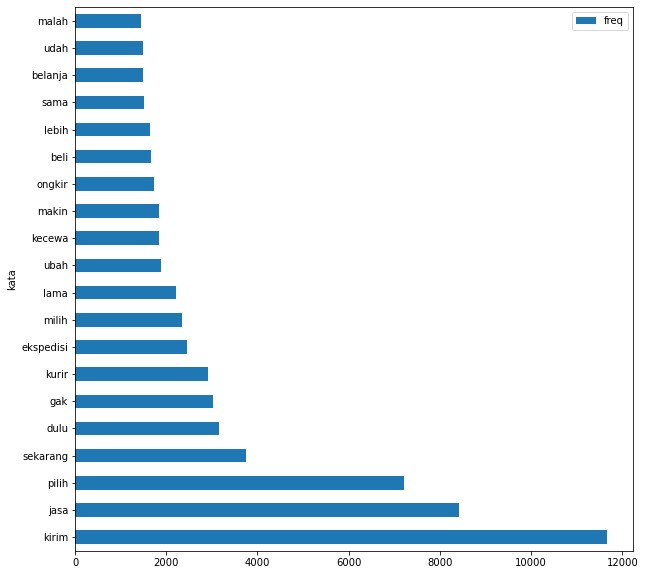

In [74]:
kamus_clean[:20].plot(kind='barh',figsize=(10,10))

In [75]:
from wordcloud import WordCloud

In [76]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud) # memunculkan data wordcloud
    plt.axis('off') # tidak ada axis

In [77]:
word_cloud=WordCloud().generate(str(df_train['DescriptionNew']))

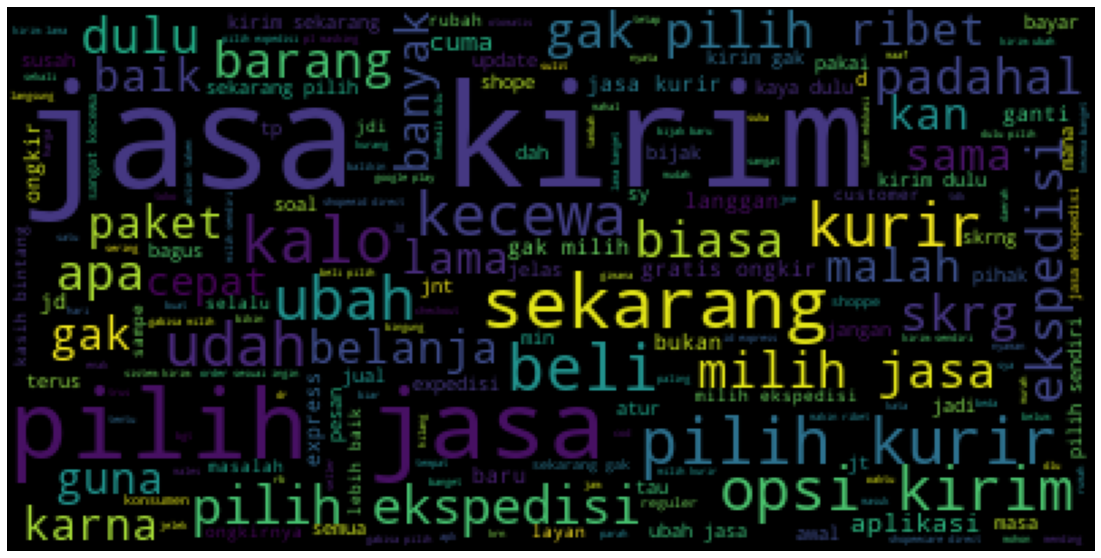

In [78]:
plot_cloud(word_cloud)

### Negative

<AxesSubplot:ylabel='kata'>

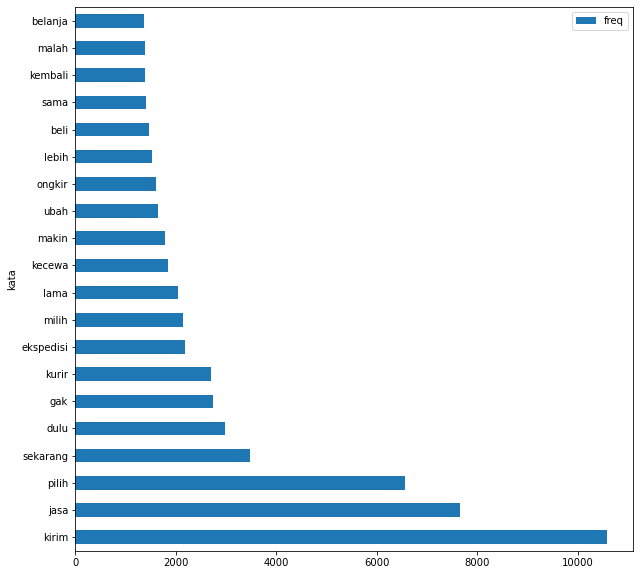

In [79]:
kamus_clean=kamus(df_train[df_train['Sentiment']=='Negative']['DescriptionNew'])
kamus_clean[:20].plot(kind='barh',figsize=(10,10))

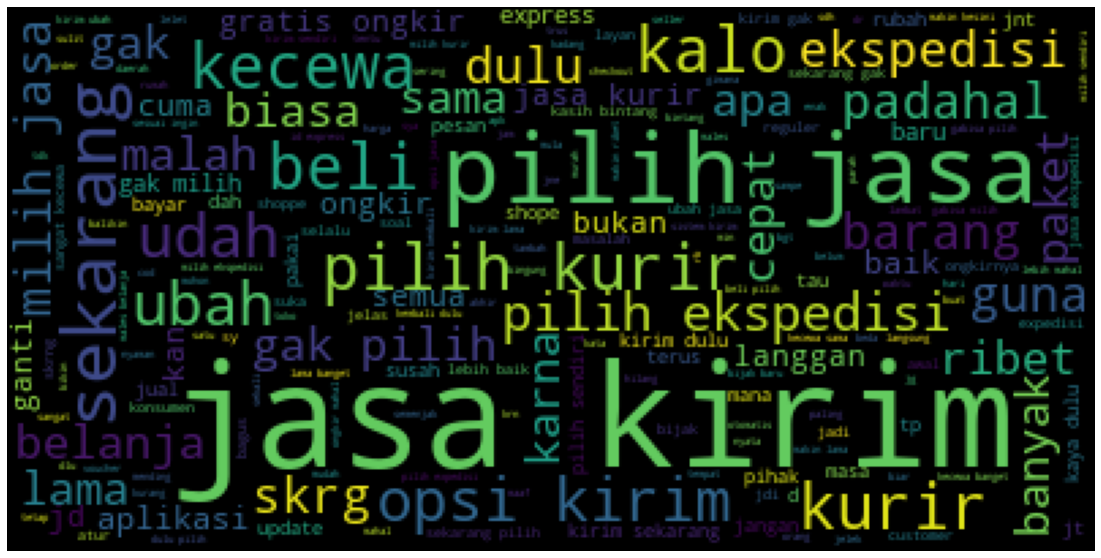

In [80]:
word_cloud=WordCloud().generate(str(df_train[df_train['Sentiment']=='Negative']['DescriptionNew']))
plot_cloud(word_cloud)

### Positive

<AxesSubplot:ylabel='kata'>

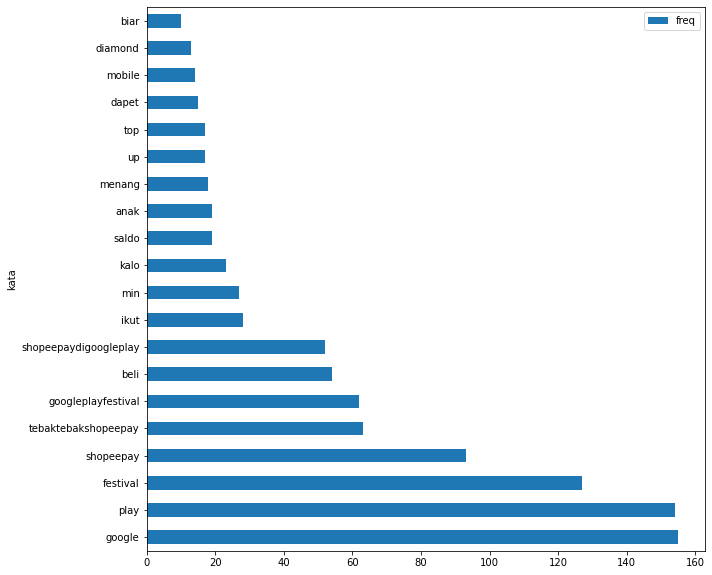

In [81]:
kamus_clean=kamus(df_train[df_train['Sentiment']=='Positive']['DescriptionNew'])
kamus_clean[:20].plot(kind='barh',figsize=(10,10))

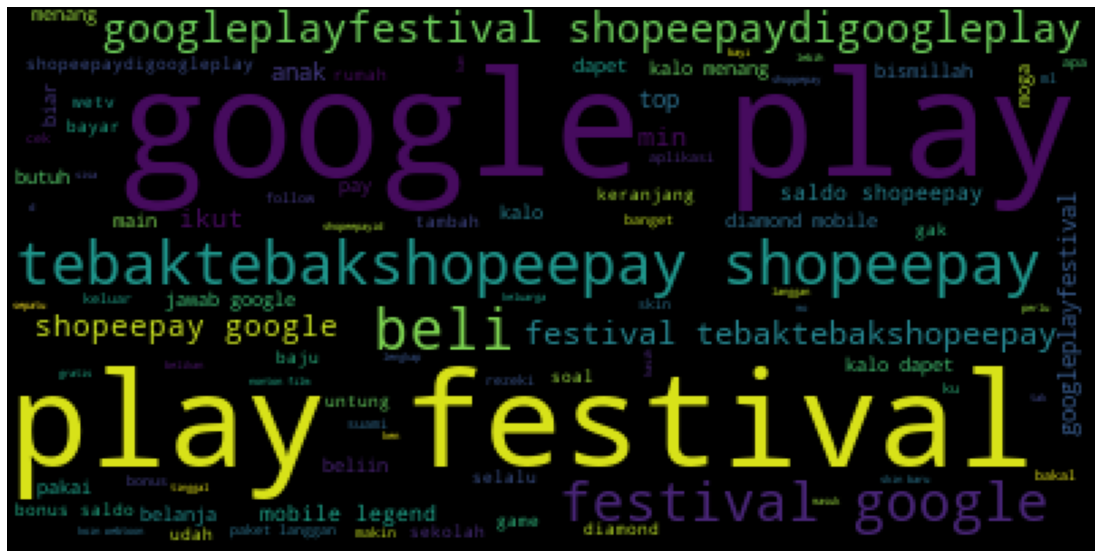

In [82]:
word_cloud=WordCloud().generate(str(df_train[df_train['Sentiment']=='Positive']['DescriptionNew']))
plot_cloud(word_cloud)

### Neutral

<AxesSubplot:ylabel='kata'>

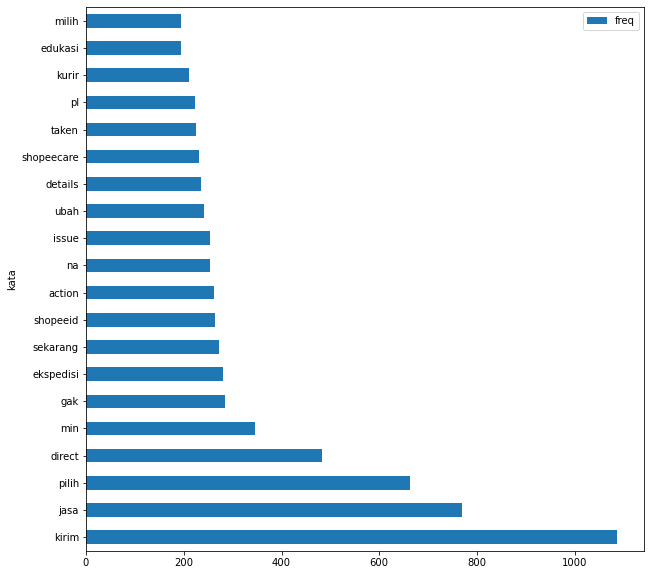

In [83]:
kamus_clean=kamus(df_train[df_train['Sentiment']=='Neutral']['DescriptionNew'])
kamus_clean[:20].plot(kind='barh',figsize=(10,10))

The same 3 top words from negative sentiment. This will surely reduce the ability of the model to predict between negative and neutral class.

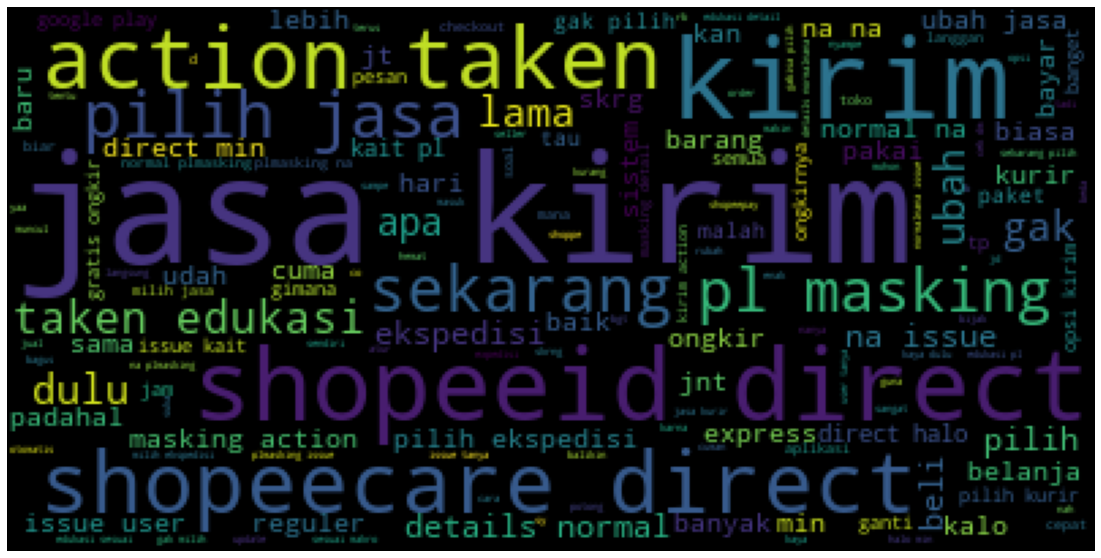

In [84]:
word_cloud=WordCloud().generate(str(df_train[df_train['Sentiment']=='Neutral']['DescriptionNew']))
plot_cloud(word_cloud)

## Length of Sentence

In [85]:
df_train['len']=df_train['DescriptionNew'].astype(str).apply(len)
df_pos=df_train[df_train['Sentiment']=='Positive']
df_neg=df_train[df_train['Sentiment']=='Negative']
df_net=df_train[df_train['Sentiment']=='Neutral']

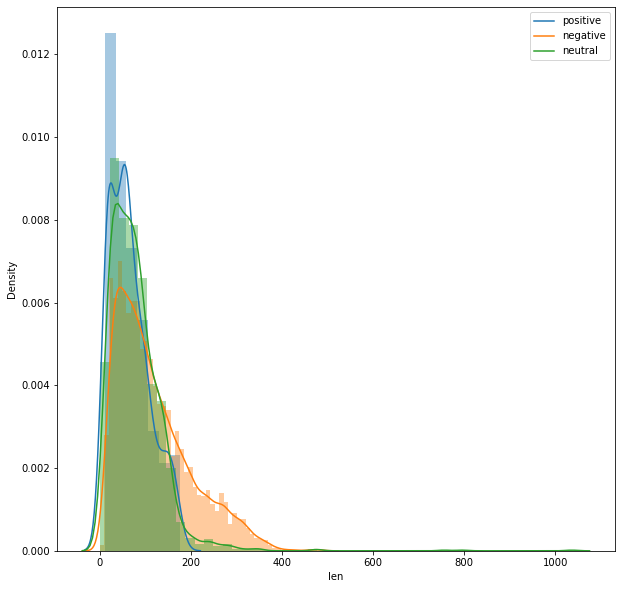

In [86]:
plt.figure(figsize=(10,10))
sns.distplot(df_pos['len'])
sns.distplot(df_neg['len'])
sns.distplot(df_net['len'])
plt.legend(['positive','negative','neutral'])
plt.show()

<AxesSubplot:xlabel='len', ylabel='Count'>

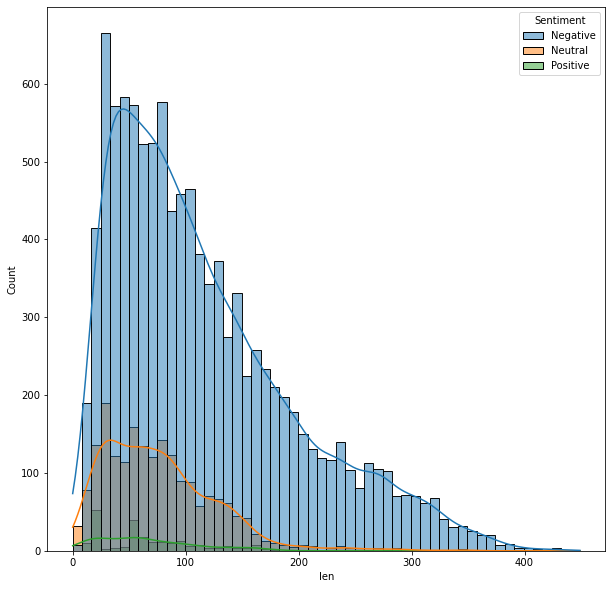

In [87]:
df2=df_train.loc[df_train['len']<450]
plt.figure(figsize=(10,10))
sns.histplot(data=df2,x='len',kde=True,hue='Sentiment')

The same length distribution.

# Model Building

## Data Splitting

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
text=df_train['DescriptionNew']
y=df_train['Sentiment']

In [90]:
text_train, text_test, y_train, y_test= train_test_split(text, y, stratify=y, random_state=2020)

In [91]:
vect=CountVectorizer().fit(text_train)
x_train=vect.transform(text_train)
x_test=vect.transform(text_test)

In [92]:
print('x_train size', repr(x_train))

x_train size <9678x12411 sparse matrix of type '<class 'numpy.int64'>'
	with 148121 stored elements in Compressed Sparse Row format>


In [93]:
feature=vect.get_feature_names_out()

In [94]:
feature

array(['aaaaaaaaaaaa', 'aaaaah', 'aaakh', ..., 'zonk', 'zonnk', 'zuzur'],
      dtype=object)

## Handling Imbalance Data

In [95]:
df_train['Sentiment'].value_counts()

Negative    10706
Neutral      1979
Positive      219
Name: Sentiment, dtype: int64

Since the difference between the three classes are too great, we can't do resampling method.
1. Undersampling will discard the majority class, and we didn't want that, i.e. Near Miss.
2. Oversampling however will make too many copied data, i.e. SMOTE.

Thus, our only options are using penalized model, such as using class_weight parameter in logistic regression. Also, by selecting the appropriate evaluation metric.

### Selecting Evaluation Metric

In [96]:
from sklearn.metrics import SCORERS

In [97]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

First consideration before selecting the proper evaluation metric is that we focused on all three classes (because this is a sentiment analysis). Thus, our options are using accuracy or ROC-AUC. To observe the probabilities, we will use ROC-AUC.

Since it is a multiclass, we will use OVO (one vs one), and using weighted since the data is imbalanced.

[Reference Weighted](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f)

## Benchmark Model

We will use logistic regression, decision tree, and random forest in search of the benchmark model. To select the best model, we will use cross-validation.

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [150]:
logreg=LogisticRegression(class_weight='balanced',random_state=2022)
tree=DecisionTreeClassifier(class_weight='balanced',random_state=2022)
rf=RandomForestClassifier(class_weight='balanced',random_state=2020)

In [151]:
def model_evaluation_cv(model, metric):
    skfold=StratifiedKFold(n_splits=5)
    return cross_val_score(model, x_train, y_train, cv=skfold, scoring=metric)

In [152]:
def print_result(model_cv):
    print('Cross validation score:', model_cv)
    print('Cross validation mean:', model_cv.mean())
    print('Cross validation std:', model_cv.std())

In [153]:
logreg_rocauc=model_evaluation_cv(logreg,'roc_auc_ovo_weighted')
tree_rocauc=model_evaluation_cv(tree,'roc_auc_ovo_weighted')
rf_rocauc=model_evaluation_cv(rf,'roc_auc_ovo_weighted')

In [154]:
print_result(logreg_rocauc)

Cross validation score: [0.94456937 0.9487601  0.94614072 0.9329774  0.95249113]
Cross validation mean: 0.9449877425136026
Cross validation std: 0.0065769938655377965


In [155]:
print_result(tree_rocauc)

Cross validation score: [0.86020538 0.86939838 0.8719072  0.83901395 0.86316491]
Cross validation mean: 0.8607379624927404
Cross validation std: 0.011643548866117378


In [156]:
print_result(rf_rocauc)

Cross validation score: [0.9391191  0.92694073 0.92924967 0.9189419  0.90714343]
Cross validation mean: 0.9242789682153967
Cross validation std: 0.010715720752270407


From cross-validation above, logistic regression will be used because it has the highest score and the lowest standard deviation.

## Model Performance in Test Set

[Reference](https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb)

In [157]:
model=LogisticRegression(class_weight='balanced',random_state=2022)
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=2022)

In [158]:
y_pred=model.predict(x_test)
y_proba=model.predict_proba(x_test)

In [138]:
classes = model.classes_
classes

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [159]:
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo', average = 'weighted')

0.9529504007152332

Better average ROC-AUC score than training dataset.

## Hyperparameter Tuning

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [176]:
model= LogisticRegression(class_weight='balanced', random_state=2022, n_jobs=-1)
pipe= Pipeline([
    ('model',model)
])

In [177]:
pipe.get_params()

{'memory': None,
 'steps': [('model',
   LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=2022))],
 'verbose': False,
 'model': LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=2022),
 'model__C': 1.0,
 'model__class_weight': 'balanced',
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': -1,
 'model__penalty': 'l2',
 'model__random_state': 2022,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [178]:
hyperparam_space={
    'model__C':[0.001,0.01,0.1,1,10],
    'model__solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__penalty':['none','l1','l2','elasticnet']
}

[Parameter](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

In [179]:
grid=GridSearchCV(pipe, hyperparam_space, cv=StratifiedKFold(n_splits=5), scoring='roc_auc_ovo_weighted')

In [180]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(class_weight='balanced',
                                                           n_jobs=-1,
                                                           random_state=2022))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10],
                         'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'model__solver': ['newton-cg', 'lbfgs', 'sag',
                                           'saga']},
             scoring='roc_auc_ovo_weighted')

In [181]:
print(grid.best_score_,grid.best_params_)

0.9494446550307627 {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'saga'}


### Before

In [183]:
logreg=LogisticRegression(class_weight='balanced',random_state=2022)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_proba=logreg.predict_proba(x_test)
print(roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo', average = 'weighted'))

0.9529504007152332


### After

In [185]:
logreg=LogisticRegression(solver='saga',C=1,penalty='l1',class_weight='balanced',random_state=2022)
logreg.fit(x_train,y_train)
y_pred2=logreg.predict(x_test)
y_proba2=logreg.predict_proba(x_test)
print(roc_auc_score(y_test, y_proba2, labels = classes, multi_class = 'ovo', average = 'weighted'))

0.957509813515234


The model is improved, but not by much.

## ROC-AUC Graph

[Reference](https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb)

In [245]:
def calculate_tpr_fpr(y_test, y_pred2):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_test, y_pred2)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [246]:
def get_all_roc_coordinates(y_test, y_proba2):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba2)):
        threshold = y_proba2[i]
        y_pred2 = y_proba2 >= threshold
        tpr, fpr = calculate_tpr_fpr(y_test, y_pred2)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [247]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [248]:
classes = logreg.classes_
classes

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [249]:
classes_combinations = []
class_list = list(classes)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
classes_combinations

[['Negative', 'Neutral'],
 ['Neutral', 'Negative'],
 ['Negative', 'Positive'],
 ['Positive', 'Negative'],
 ['Neutral', 'Positive'],
 ['Positive', 'Neutral']]

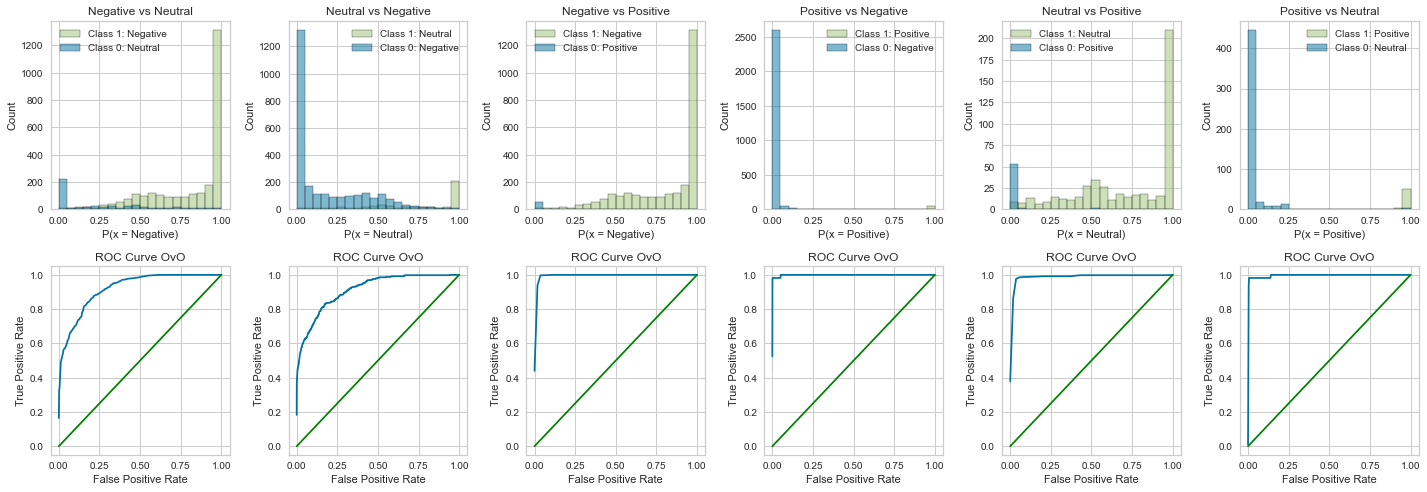

In [266]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = c1 + " vs " +c2
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = text_test.copy()
    df_aux = pd.DataFrame(df_aux)
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba2[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [267]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.15f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.15f}")

Negative vs Neutral ROC AUC OvO: 0.919650541287313
Neutral vs Negative ROC AUC OvO: 0.912745919584485
Negative vs Positive ROC AUC OvO: 0.997642342709607
Positive vs Negative ROC AUC OvO: 0.999082755809213
Neutral vs Positive ROC AUC OvO: 0.990339761248852
Positive vs Neutral ROC AUC OvO: 0.995335169880624
average ROC AUC OvO: 0.969132748420016


This classifier model can differ the positive class from the rest of the class very well. As expected, neutral vs negative has lower ROC AUC score compared to Positive OvR.

## Checking

In [268]:
cek=pd.DataFrame({
    'Description':text_test,
    'Actual':y_test,
    'Predicted':y_pred,
    'Predicted_HT':y_pred2
})

### Model Before

In [269]:
len(cek[(cek['Actual']=='Negative')&(cek['Predicted']=='Negative')])/len(cek[cek['Actual']=='Negative'])

0.8658445440956651

In [270]:
len(cek[(cek['Actual']=='Positive')&(cek['Predicted']=='Positive')])/len(cek[cek['Actual']=='Positive'])

0.9818181818181818

In [271]:
len(cek[(cek['Actual']=='Neutral')&(cek['Predicted']=='Neutral')])/len(cek[cek['Actual']=='Neutral'])

0.7858585858585858

### Model After

In [272]:
len(cek[(cek['Actual']=='Negative')&(cek['Predicted_HT']=='Negative')])/len(cek[cek['Actual']=='Negative'])

0.8658445440956651

In [273]:
len(cek[(cek['Actual']=='Positive')&(cek['Predicted_HT']=='Positive')])/len(cek[cek['Actual']=='Positive'])

0.9818181818181818

In [274]:
len(cek[(cek['Actual']=='Neutral')&(cek['Predicted_HT']=='Neutral')])/len(cek[cek['Actual']=='Neutral'])

0.7858585858585858

### Check

In [275]:
cek[(cek['Actual']=='Negative')&~(cek['Predicted_HT']=='Negative')]

Description  \
8846                                                                                                                                                                                                                                                                                                                                                                                                                                                                            jasa kirim pleksibel dulu   
15538                                                                                                                                                                                                                                             susah buka menu pulsatagihan padahal internet kenceng apk sudh baru tp ttep gabisa buka malah loading terus mana order gabisa pilih jasa kirim awal pilih diwaktugaditentuin kapan super duper ribeet tinggalin apk tp sayang saldo shopeepay ku banyak   
11952                                                                                                                                                                                                                                                                                                                                                                                                                                         sekrang jlek pilih expedisi bli kan langgan knpa shope plih   
8930                                                                                                                                                                                                                                                                                                                                                                                                                                                                             pilih jasa kirim tololll   
8058                                                                                                                                                                                                                                                                                                                                                                                                                                                    auto ekspedisi baik kalian baik cust cukup bubyee   
12843                                                                                                                                                                                                                                                                                                                         shope sekarang jelekk nga pilih jasa kirim sendiri padahal biasa kalo ongkir jt malah shope exspress kan paket lama banget datengnya gimana sii shope express ongkirnya kan   
9938                                                                                                                                                                                                                                                                                                 updatenya jangan lebih semangat bijak pilih kurir sendiri pilih yaa kadang paket lama datang minggu pdahal malang beli tegal kirim kadang minggu padahal main update sperti dulu biar pilih jt je ok   
13529                                                                                                                                                                                                                                                                                                                                                                                                                                                 kirim atur otomatis pilih ekpedisi dulu kurang muas   
16530                                    

In [276]:
cek[(cek['Actual']=='Neutral')&~(cek['Predicted_HT']=='Neutral')]

Description  \
3310                                                                                                                                                                                                                                                              padahal w suka bgt fitur pilih jasa kirim apa favorit ninja huhuhu whyyy   
3246                                                                                                                                                                                                                                                                           yakan bener bingung jnt skg option pdhl nyaman bgt sama jnt   
7174                                                                                                                                                april kirim reguler udah reguler tpi gabisa milih jt trus dpt express udah minggu lebih blm dateng paket bintang sedih gabisa milih jt lgi konsisten hari paket datang tuju kalimantan   
174                                                                                                                                                                                                                                                                                                    tetep kyk terus belanja lebaran bye   
7839                                                                                                                                                                                                                                                                                                             sekarang milih jasa kirim   
7970                                                                                                                                                                                                                                                                     pilih jasa kirim mending versi lama biar nentuin kurir beli ingin   
422                                                                                                                                                                                                                                                                                  balikin fitur kirim jasa kaya dulu pakai express lama   
267                                                                                                                                                                                                                                                                                                         seru sekarang pilih jasa kirim   
7749  guna cukup lama semenjak awal aplikasi online shop muncul makin kesini bnyk ubah paling sesal ubah jasa kirim mungkin bagi untung jasa kirim sedia sekarang dapat bagi kirim rata semua jasa kirim pakai sisi langgan sangat rugi soal pilih jasa kirim sangat penting jangan selepe soal jasa kirim jga masing pnya kualitas pelynn   
7156                                                                                                                           march salah alamat mohon buat aplikasi inikemarin pesan baran kirim regulerinstan pilih reguler daerah kirim jt jne sekarang barang datang harap kirim dulu lagibisa pilih kurir mudah beli barang aplikasi   
3339                                                                                                                                                                          syopiexpres kalo ekspedisi bom mampu pngiriman luar pjawa jgn dipaksain serius barang tahan dc serpong sejak tgl tlg sadar mampu mending henti dulu aktivita   
7791                                                                                                                                                                                                                                moga kembali jasa kirim dulu pilih jasa kirim ingin makin banyak gratis ongkir daga

In [277]:
cek[(cek['Actual']=='Positive')&~(cek['Predicted_HT']=='Positive')]

Description  \
643  udah lebih biasa cepatyang bener ceper malah jt super lama banget   

       Actual Predicted Predicted_HT  
643  Positive   Neutral      Neutral

# Predicting New Data

In [278]:
test=vect.transform(df_test['DescriptionNew'])

In [279]:
prediction = grid.predict(test)
probability = grid.predict_proba(test)

In [280]:
df_test['Prediction']=prediction

In [281]:
probability[1][0]

0.4671033797069213

In [282]:
prob_negative=[]
prob_neutral=[]
prob_positive=[]

for i in probability:
    prob_negative.append(i[0])
    prob_neutral.append(i[1])
    prob_positive.append(i[2])    

In [283]:
df_test['Neg_Proba']=prob_negative
df_test['Neut_Proba']=prob_neutral
df_test['Positive_Proba']=prob_positive

## Checking

### Negative

In [284]:
df_test[(df_test['Prediction']=='Negative')]['Neg_Proba'].describe()

count    3669.000000
mean        0.863140
std         0.161454
min         0.341027
25%         0.739677
50%         0.952272
75%         0.993635
max         1.000000
Name: Neg_Proba, dtype: float64

In [285]:
len(df_test[(df_test['Prediction']=='Negative')&(df_test['Neg_Proba']<=0.5)])

34

In [288]:
df_test[(df_test['Prediction']=='Negative')&(df_test['Neg_Proba']<=0.5)][['Description','DescriptionNew','Prediction','Neg_Proba','Neut_Proba','Positive_Proba']]

Description  \
871                                                                                                                                               Gimana-gimana? Bingung konsepnya, ngapa ngak kek sebelumnya aja ?                                                   
899    Kalo aku dapet...aku mau heboh bikin perlombaan anak yg gak ikut agustusan...karena harus bayar...kacian kan..mangkanya aku mau bikin...perlombaan Septemberan...???#GooglePlayFestival#ShopeePaldiGooglePlay@dinda...                                         
1332                                                                                                                                        paling nggak suka klu dibalas copas gini, semua jawaban orang dibalas gini.                                               
1371                                                                                                                                    Lah Klo Tipe layanan yang pengguna inginkan itu bkn kya gini Klo ke gini nyusahin?                                            
1637                                                                                                                  Trnyata ada yg sepemikiran? bener euy balikin kyk semula aja lah, id express udh yg paling murah+cpt.                                           
1807                                                                                                                                                                kita yg beli kok km yg milih ekspedisinya tu gmn?                                                 
1870                                                                                                                                            tolong dong balikin pemilihan sendiri ekpedisi nya, hmmm meresahkan ?                                                 
2137                                                                                                                                    iya ka pasti ujung2nya yg dikomplain sellernya kalau keterlambatan paket pasti                                                
2210                                                                                                                                     G enk sistem yg baru,sy sebagai pengguna shoppe buat dijual lgi merasa g nyaman                                              
2413                                                                                                                                                                                betulll auto ancang2 pindah                                                       
2421                                                                                                                                                                  YUK KASIH BINTANG 1 AJA DI PLASTORE/APSTORE                                                     
2547                                                                                                                                                                                      Shopee xpress lemot                                                         
4639                                                                                                                                                   pindah ah download tokopaedi aja..  ga ada untuk milih ekpedisinya. gak asik.                                  
4906                                                                                                                                                                                    udh kaya lazada aja sekarang sistemnya ?                                      
4935                                                                                                                                                                        Sorry udah punya!! titip salam ya buat semua kurirnya                                     
4997                                    

899 should be positive, but the hashtags were connected, thus didn't recognized by the model.

### Neutral

In [289]:
df_test[(df_test['Prediction']=='Neutral')]['Neut_Proba'].describe()

count    3617.000000
mean        0.862960
std         0.178823
min         0.393772
25%         0.713824
50%         0.989208
75%         0.999336
max         1.000000
Name: Neut_Proba, dtype: float64

In [291]:
df_test[(df_test['Prediction']=='Neutral')&(df_test['Neut_Proba']<0.5)][['Description','DescriptionNew','Prediction','Neg_Proba','Neut_Proba','Positive_Proba']]

Description  \
829                                                                                                                                                                                pengalaman nya bukan tambah menyenangkan...rambah ribett ???                                                    
1035                                                                                                                                                                                       Ini kenapa setiap dari tgl 25 ga bisa pake spaylater..                                                  
1067                                                                                                                                                                             terbaik dari mana dari hongkong ?? bukannya baik malah jadi ruwet .                                               
1078                                                                                                                                                                                                biasanya bisa diganti sebelum 1jam an cmiiw                                                    
1169                                                                                                                                        bener , kosaan gua dekeut kantor DP j&t kalo pake j&t ga khawatir tinggal ambil, kalo random gini malah ga tenang                                      
1319                                                                                                                                                                                           GIMANA YA? SAYA TIAP HARI MAU GANTI TAPI GABISA TRS                                                 
1344                                                                                                                        Woy expedisinya balikinn.. Biar kita yang milihhh... Hahaha shopee exspres Udh kaya siputttttt??1 minggu? Keburu jamuran woy                                           
1360                                                                                                                                                                                        Hia..mahal di ongkir , separoh lebih dr hrg barangny                                                   
1366                                                                                                                                                                                                   gak guna. Mending balik ke si ijo ajalah.                                                   
1376                                                                                                                                           Gue udahh mulai beralih ke si biru ini wkwkwk orens payahh lebih murah ongkirnyaaa cuss gasss onliners???                                           
1559                                       Gak bisa lagi order instan di Shopee. Kezzel banget kalo lgi butuh urgent. biasanya cihuyy pake gosend instan. Tapi sejak gak bisa milih ekspedisi, jdi luammmaa. #ShopeeExpress instan juga leleed syekaliiiii. Ganti jas...                           
1758                                                                                                                                      Ya ampunn...shopee pay baru top up..tiba2 ongkir melejit...balik lagi dech belanja ke swalayan dekat rumah..                                             
1836                                                                                                                                               bener mba ? kaya kemarin paketan mpasi anak ku kotaknya dah kebuka gitu ?? untung isinya gk tumpah huhuu                                        
1919                                                                                                                                                                                         

### Positive

In [292]:
df_test[(df_test['Prediction']=='Positive')]['Positive_Proba'].describe()

count    83.000000
mean      0.986456
std       0.033928
min       0.726383
25%       0.989176
50%       0.996394
75%       0.998664
max       1.000000
Name: Positive_Proba, dtype: float64

In [293]:
len(df_test[(df_test['Prediction']=='Positive')&(df_test['Positive_Proba']<0.9)])

2

In [294]:
df_test[(df_test['Prediction']=='Positive')&(df_test['Positive_Proba']<0.9)]

Case Number Contact Type Opened Date              Enquiry Details  \
1950    212777636    Instagram  2021-09-17        General Enquiries_MKT   
5555    215324586      Twitter  2021-09-23  General Enquiries_ShopeePay   

     Enquiry Type  \
1950    Marketing   
5555    ShopeePay   

                                                                                                                                                         Description  \
1950  Bissmilah buat keperluan ibu?soalnya ibu pengen mesin pembuat keripik#googleplayfestival #shopeepaydigoogleplay                                                  
5555                          ini beneran verifikasi akun harus nyangkut ke Google playstore? nasib pengguna harmony OS (huawei) gimana?                               

     Sentiment  \
1950       NaN   
5555       NaN   

                                                                                     DescriptionNew  \
1950  bissmilah perlu ibusoalnya ibu ken mesin buat keripikgoogleplayfestival shopeepaydigoogleplay   
5555          beneran verifikasi akun nyangkut google playstore nasib guna harmony os huawei gimana   

     Prediction  Neg_Proba  Neut_Proba  Positive_Proba  
1950   Positive   0.045574    0.058987        0.895439  
5555   Positive   0.020085    0.253533        0.726383

# Closing

I am aware of my lack in experience with handling the data imbalance, but I had tried my best. From my POV, it's good enough for my first study case related to ROC AUC, NLP, and multiclass classifier. I hope I can get more professional experience and improve my skills in data science. Thanks for reading!